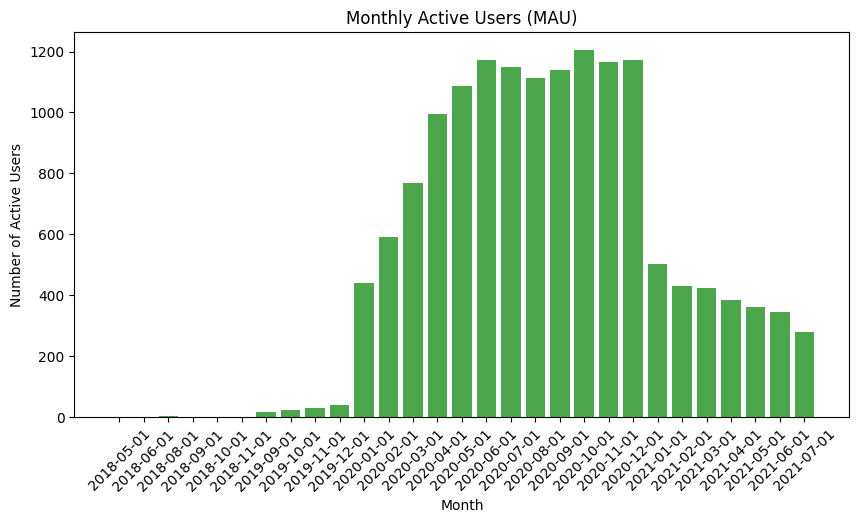

Transition Matrix:
                colorgrading    export    delete  compress   extract  \
colorgrading        0.762707  0.015134  0.003427  0.015134  0.012564   
export              0.005685  0.714172  0.003391  0.069612  0.033709   
delete              0.004042  0.015360  0.537995  0.034357  0.007680   
compress            0.001935  0.023014  0.003075  0.834860  0.010436   
extract             0.003968  0.058841  0.001645  0.018001  0.840801   
merge               0.003617  0.013380  0.015968  0.060078  0.007175   
split               0.005240  0.012254  0.006338  0.046903  0.011831   
print               0.008691  0.015396  0.001987  0.020859  0.008940   
reader              0.011364  0.011364  0.011364  0.039773  0.011364   
unlock              0.001091  0.003929  0.000873  0.010696  0.003274   
aibackground        0.011687  0.018575  0.004347  0.016033  0.015049   
share-document      0.000000  0.080000  0.000000  0.040000  0.040000   
coupon              0.006883  0.012291  0.001

/var/folders/wx/9n292s155d122llxsys0ml2h0000gn/T/ipykernel_16241/474700146.py:80: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.781450332294301' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  transition_matrix.loc[from_page, to_page] = count / total_transitions
/var/folders/wx/9n292s155d122llxsys0ml2h0000gn/T/ipykernel_16241/474700146.py:80: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.035258483796977005' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  transition_matrix.loc[from_page, to_page] = count / total_transitions
/var/folders/wx/9n292s155d122llxsys0ml2h0000gn/T/ipykernel_16241/474700146.py:80: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.060077

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from collections import defaultdict

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np


df=pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')

# Retention: Users who come back to complete tasks over a certain period (e.g., users with tasks completed in multiple months).
# Engagement: Frequency of task completion (e.g., average number of tasks per user per week).

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract date components
df['date'] = df['ts'].dt.date
df['week'] = df['ts'].dt.to_period('W').apply(lambda r: r.start_time)
df['month'] = df['ts'].dt.to_period('M').apply(lambda r: r.start_time)
df.head()


# Calculate MAU: Monthly Active Users
mau = df.groupby('month')['user_id'].nunique().reset_index(name='MAU')


# Plotting MAU
plt.figure(figsize=(10, 5))
plt.bar(mau['month'].astype(str), mau['MAU'], color='green', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Number of Active Users')
plt.title('Monthly Active Users (MAU)')
plt.xticks(rotation=45)
plt.show()

# Conclusion - We observe a peak of MAU in Dec'19 to Dec'20 and observe a downfall of MAU

# Sort the DataFrame by user_id and timestamp
df = df.sort_values(by=['user_id', 'ts'])

# Group by user_id and aggregate the pages visited
user_journeys = df.groupby('user_id')['page'].apply(list).reset_index()

# Convert the list of pages into a string for vectorization
user_journeys['page_str'] = user_journeys['page'].apply(lambda x: ' '.join(x))

# Vectorize the user journeys
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(user_journeys['page_str'])

# Perform K-means clustering
num_clusters = 5  # You can change the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# Add the cluster labels to the DataFrame
user_journeys['cluster'] = kmeans.labels_

# Initialize a dictionary to store the counts of transitions
transition_counts = defaultdict(lambda: defaultdict(int))

# Populate the transition counts
for journey in user_journeys['page']:
    for i in range(len(journey) - 1):
        transition_counts[journey[i]][journey[i + 1]] += 1

# Create a list of unique pages
unique_pages = list({page for journey in user_journeys['page'] for page in journey})

# Initialize the transition matrix
transition_matrix = pd.DataFrame(0, index=unique_pages, columns=unique_pages)

# Populate the transition matrix
for from_page, transitions in transition_counts.items():
    total_transitions = sum(transitions.values())
    for to_page, count in transitions.items():
        transition_matrix.loc[from_page, to_page] = count / total_transitions

# Display the transition matrix
print("Transition Matrix:")
print(transition_matrix)



In [2]:
# Import necessary libraries
import pandas as pd
from collections import Counter

# Load the CSV file into a DataFrame
df=pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Sort the DataFrame by user_id and timestamp
df = df.sort_values(by=['user_id', 'ts'])

# Extract week from the timestamp
df['week'] = df['ts'].dt.to_period('W').apply(lambda r: r.start_time)

# Calculate WAU: Weekly Active Users
wau = df.groupby('week')['user_id'].unique().reset_index(name='active_users')

# Initialize a list to store all weekly user journeys
weekly_user_journeys = []

# Iterate through each week and get the user journeys for that week
for week in wau['week']:
    # Filter the DataFrame for the current week
    week_data = df[df['week'] == week]
    
    # Group by user_id and aggregate the pages visited
    user_journeys = week_data.groupby('user_id')['page'].apply(list).reset_index()
    
    # Append the weekly user journeys to the list
    weekly_user_journeys.extend(user_journeys['page'].tolist())

# Display a sample of weekly user journeys
print("Sample Weekly User Journeys:")
print(weekly_user_journeys[:5])

# Use Counter to find the most common user journeys
journey_counter = Counter(tuple(journey) for journey in weekly_user_journeys)

# Get the most common journey
most_common_journey, count = journey_counter.most_common(1)[0]

# Display the most common journey and its count
print("Most Common User Journey for Weekly Active Users:")
print(f"Journey: {most_common_journey}, Count: {count}")


Sample Weekly User Journeys:
[['split', 'split', 'coupon'], ['coupon'], ['compress', 'compress'], ['protect', 'protect'], ['compress', 'compress']]
Most Common User Journey for Weekly Active Users:
Journey: ('aibackground',), Count: 2224


In [3]:
pip install collections

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract additional time components
df['date'] = df['ts'].dt.date
df['week'] = df['ts'].dt.to_period('W').apply(lambda r: r.start_time)
df['month'] = df['ts'].dt.to_period('M').apply(lambda r: r.start_time)

# Display the first few rows of the DataFrame


# Calculate monthly active users (MAU)
mau = df.groupby('month')['user_id'].nunique().reset_index(name='MAU')

# Calculate retention rates
df['next_month'] = df['month'] + pd.DateOffset(months=1)
retention = df.groupby(['month', 'next_month'])['user_id'].nunique().reset_index(name='retained_users')

# Merge with MAU to calculate retention rate
retention = retention.merge(mau, left_on='month', right_on='month', how='left')
retention['retention_rate'] = retention['retained_users'] / retention['MAU']

# Display retention rates
print(retention)

        month next_month  retained_users   MAU  retention_rate
0  2018-05-01 2018-06-01               1     1             1.0
1  2018-06-01 2018-07-01               1     1             1.0
2  2018-08-01 2018-09-01               2     2             1.0
3  2018-09-01 2018-10-01               1     1             1.0
4  2018-10-01 2018-11-01               1     1             1.0
5  2018-11-01 2018-12-01               1     1             1.0
6  2019-09-01 2019-10-01              17    17             1.0
7  2019-10-01 2019-11-01              23    23             1.0
8  2019-11-01 2019-12-01              30    30             1.0
9  2019-12-01 2020-01-01              38    38             1.0
10 2020-01-01 2020-02-01             440   440             1.0
11 2020-02-01 2020-03-01             591   591             1.0
12 2020-03-01 2020-04-01             767   767             1.0
13 2020-04-01 2020-05-01             996   996             1.0
14 2020-05-01 2020-06-01            1086  1086         

In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])


# Extract the week and month from the timestamp
df['week'] = df['ts'].dt.to_period('W').apply(lambda r: r.start_time)
df['month'] = df['ts'].dt.to_period('M').apply(lambda r: r.start_time)

# Calculate weekly active users (WAU)
wau = df.groupby('week')['user_id'].unique().reset_index(name='active_users')

# Calculate monthly active users (MAU)
mau = df.groupby('month')['user_id'].unique().reset_index(name='active_users')

# Initialize dictionaries to store weekly and monthly retention rates
weekly_retention = []
monthly_retention = []

# Calculate weekly retention rates
for i in range(len(wau) - 1):
    current_week = wau.loc[i, 'week']
    next_week = wau.loc[i + 1, 'week']
    
    current_users = set(wau.loc[i, 'active_users'])
    next_users = set(wau.loc[i + 1, 'active_users'])
    
    retained_users = len(current_users & next_users)
    retention_rate = retained_users / len(current_users)
    
    weekly_retention[current_week] = retention_rate

# Calculate monthly retention rates
for i in range(len(mau) - 1):
    current_month = mau.loc[i, 'month']
    next_month = mau.loc[i + 1, 'month']
    
    current_users = set(mau.loc[i, 'active_users'])
    next_users = set(mau.loc[i + 1, 'active_users'])
    
    retained_users = len(current_users & next_users)
    retention_rate = retained_users / len(current_users)
    
    monthly_retention[current_month] = retention_rate

# Convert retention data to DataFrames for better readability
weekly_retention_df = pd.DataFrame(list(weekly_retention.items()), columns=['week', 'weekly_retention_rate'])
monthly_retention_df = pd.DataFrame(list(monthly_retention.items()), columns=['month', 'monthly_retention_rate'])

# Display weekly and monthly retention rates
print("Weekly Retention Rates:")
print(weekly_retention_df)
print("\nMonthly Retention Rates:")
print(monthly_retention_df)

# Plotting the retention rates
import matplotlib.pyplot as plt

# Plot weekly retention rates
plt.figure(figsize=(12, 6))
plt.plot(weekly_retention_df['week'], weekly_retention_df['weekly_retention_rate'], marker='o', linestyle='-', color='b')
plt.title('Weekly Retention Rates')
plt.xlabel('Week')
plt.ylabel('Retention Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot monthly retention rates
plt.figure(figsize=(12, 6))
plt.plot(monthly_retention_df['month'], monthly_retention_df['monthly_retention_rate'], marker='o', linestyle='-', color='g')
plt.title('Monthly Retention Rates')
plt.xlabel('Month')
plt.ylabel('Retention Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Add a NaN value for the last month which cannot have a retention rate
monthly_retention.append(None)

# Create a new column for monthly retention in the original DataFrame
df['monthly_retention_rate'] = df['month'].map(dict(zip(mau['month'], monthly_retention)))

df.head()


TypeError: list indices must be integers or slices, not Timestamp

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month from the timestamp
df['month'] = df['ts'].dt.to_period('M').apply(lambda r: r.start_time)

# Calculate monthly active users (MAU)
mau = df.groupby('month')['user_id'].unique().reset_index(name='active_users')

# Initialize a list to store monthly retention rates
monthly_retention = []

# Calculate monthly retention rates
for i in range(len(mau) - 1):
    current_month = mau.loc[i, 'month']
    next_month = mau.loc[i + 1, 'month']
    
    current_users = set(mau.loc[i, 'active_users'])
    next_users = set(mau.loc[i + 1, 'active_users'])
    
    retained_users = len(current_users & next_users)
    retention_rate = retained_users / len(current_users)
    
    monthly_retention.append(retention_rate)

# Add a NaN value for the last month which cannot have a retention rate
monthly_retention.append(None)



# Create a new column for monthly retention in the original DataFrame
df['monthly_retention_rate'] = df['month'].map(dict(zip(mau['month'], monthly_retention)))

# Display the DataFrame with the new column
print(df.head())

# Convert categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['os', 'browser', 'plan', 'page'], drop_first=True)

# Display the encoded DataFrame
print(df_encoded.head())

# Calculate retention rate for each attribute
def calculate_attribute_retention(df, attribute):
    attribute_retention = []
    unique_months = df['month'].unique()
    
    for i in range(len(unique_months) - 1):
        current_month = unique_months[i]
        next_month = unique_months[i + 1]
        
        current_users = df[df['month'] == current_month].groupby(attribute)['user_id'].unique()
        next_users = df[df['month'] == next_month].groupby(attribute)['user_id'].unique()
        
        retention_rate = {}
        for attr in current_users.index:
            if attr in next_users.index:
                retained_users = len(set(current_users[attr]) & set(next_users[attr]))
                retention_rate[attr] = retained_users / len(current_users[attr])
            else:
                retention_rate[attr] = 0
        
        attribute_retention.append((current_month, retention_rate))
    
    return attribute_retention

# Calculate retention for 'os', 'browser', 'plan', and 'page'
os_retention = calculate_attribute_retention(df, 'os')
browser_retention = calculate_attribute_retention(df, 'browser')
plan_retention = calculate_attribute_retention(df, 'plan')
page_retention = calculate_attribute_retention(df, 'page')

# Convert the results to DataFrames for easier manipulation
os_retention_df = pd.DataFrame(os_retention, columns=['month', 'os_retention']).set_index('month')
browser_retention_df = pd.DataFrame(browser_retention, columns=['month', 'browser_retention']).set_index('month')
plan_retention_df = pd.DataFrame(plan_retention, columns=['month', 'plan_retention']).set_index('month')
page_retention_df = pd.DataFrame(page_retention, columns=['month', 'page_retention']).set_index('month')

# Display the retention DataFrames
print(os_retention_df.head())
print(browser_retention_df.head())
print(plan_retention_df.head())
print(page_retention_df.head())

# Flatten the retention dictionaries for correlation calculation
def flatten_retention_df(retention_df, attribute):
    flattened_data = []
    for month, retention in retention_df.iterrows():
        for attr, rate in retention[0].items():
            flattened_data.append((month, attr, rate))
    return pd.DataFrame(flattened_data, columns=['month', attribute, 'retention_rate'])

# Flatten the DataFrames
flat_os_retention = flatten_retention_df(os_retention_df, 'os')
flat_browser_retention = flatten_retention_df(browser_retention_df, 'browser')
flat_plan_retention = flatten_retention_df(plan_retention_df, 'plan')
flat_page_retention = flatten_retention_df(page_retention_df, 'page')

# Merge with the main DataFrame to get monthly retention rates
merged_df = df[['month', 'monthly_retention_rate']].drop_duplicates().set_index('month')
merged_os_df = flat_os_retention.merge(merged_df, on='month')
merged_browser_df = flat_browser_retention.merge(merged_df, on='month')
merged_plan_df = flat_plan_retention.merge(merged_df, on='month')
merged_page_df = flat_page_retention.merge(merged_df, on='month')

# Calculate correlation coefficients
os_correlation = merged_os_df.corr()['monthly_retention_rate']['retention_rate']
browser_correlation = merged_browser_df.corr()['monthly_retention_rate']['retention_rate']
plan_correlation = merged_plan_df.corr()['monthly_retention_rate']['retention_rate']
page_correlation = merged_page_df.corr()['monthly_retention_rate']['retention_rate']

# Display the correlation coefficients
print("OS Correlation with Monthly Retention Rate:", os_correlation)
print("Browser Correlation with Monthly Retention Rate:", browser_correlation)
print("Plan Correlation with Monthly Retention Rate:", plan_correlation)
print("Page Correlation with Monthly Retention Rate:", page_correlation)

# Scatter plot for OS retention correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='retention_rate', y='monthly_retention_rate', hue='os', data=merged_os_df)
plt.title('Correlation between OS Retention and Monthly Retention Rate')
plt.xlabel('OS Retention Rate')
plt.ylabel('Monthly Retention Rate')
plt.show()

# Scatter plot for Browser retention correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='retention_rate', y='monthly_retention_rate', hue='browser', data=merged_browser_df)
plt.title('Correlation between Browser Retention and Monthly Retention Rate')
plt.xlabel('Browser Retention Rate')
plt.ylabel('Monthly Retention Rate')
plt.show()

# Scatter plot for Plan retention correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='retention_rate', y='monthly_retention_rate', hue='plan', data=merged_plan_df)
plt.title('Correlation between Plan Retention and Monthly Retention Rate')
plt.xlabel('Plan Retention Rate')
plt.ylabel('Monthly Retention Rate')
plt.show()

# Scatter plot for Page retention correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='retention_rate', y='monthly_retention_rate', hue='page', data=merged_page_df)
plt.title('Correlation between Page Retention and Monthly Retention Rate')
plt.xlabel('Page Retention Rate')
plt.ylabel('Monthly Retention Rate')
plt.show()



   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
4           4 2020-01-19 02:23:02  212955203693754102065312977639302287127   

        os  browser     plan      page      month  monthly_retention_rate  
0   mac_os  Firefox  monthly     merge 2020-01-01                0.186364  
1   mac_os  Firefox  monthly    delete 2020-01-01                0.186364  
2  windows  Firefox  monthly    export 2020-01-01                0.186364  
3  windows  Firefox  monthly    rotate 2020-01-01                0.186364  
4  windows  Firefox  monthly  compress 2020-01-01                0.186364  
   Unnamed: 0                  ts                                  user_id 

/var/folders/wx/9n292s155d122llxsys0ml2h0000gn/T/ipykernel_17934/2464668821.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for attr, rate in retention[0].items():


ValueError: could not convert string to float: 'Chrome'

In [20]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month from the timestamp
df['month'] = df['ts'].dt.to_period('M').apply(lambda r: r.start_time)

# Display the first few rows of the DataFrame
print(df.head())

# Calculate monthly active users (MAU)
mau = df.groupby('month')['user_id'].unique().reset_index(name='active_users')

# Initialize a list to store monthly retention rates
monthly_retention = []

# Calculate monthly retention rates
for i in range(len(mau) - 1):
    current_month = mau.loc[i, 'month']
    next_month = mau.loc[i + 1, 'month']
    
    current_users = set(mau.loc[i, 'active_users'])
    next_users = set(mau.loc[i + 1, 'active_users'])
    
    retained_users = len(current_users & next_users)
    retention_rate = retained_users / len(current_users)
    
    monthly_retention.append(retention_rate)

# Add a NaN value for the last month which cannot have a retention rate
monthly_retention.append(None)

# Create a new column for monthly retention in the original DataFrame
df['monthly_retention_rate'] = df['month'].map(dict(zip(mau['month'], monthly_retention)))

# Display the DataFrame with the new column
print(df.head())

# Convert categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['os', 'browser', 'plan', 'page'], drop_first=True)

# Display the encoded DataFrame
print(df_encoded.head())
# Calculate retention rate for each attribute
def calculate_attribute_retention(df, attribute):
    attribute_retention = []
    unique_months = df['month'].unique()
    
    for i in range(len(unique_months) - 1):
        current_month = unique_months[i]
        next_month = unique_months[i + 1]
        
        current_users = df[df['month'] == current_month].groupby(attribute)['user_id'].unique()
        next_users = df[df['month'] == next_month].groupby(attribute)['user_id'].unique()
        
        retention_rate = {}
        for attr in current_users.index:
            if attr in next_users.index:
                retained_users = len(set(current_users[attr]) & set(next_users[attr]))
                retention_rate[attr] = retained_users / len(current_users[attr])
            else:
                retention_rate[attr] = 0
        
        attribute_retention.append((current_month, retention_rate))
    
    return attribute_retention

# Calculate retention for 'os', 'browser', 'plan', and 'page'
os_retention = calculate_attribute_retention(df, 'os')
browser_retention = calculate_attribute_retention(df, 'browser')
plan_retention = calculate_attribute_retention(df, 'plan')
page_retention = calculate_attribute_retention(df, 'page')

# Convert the results to DataFrames for easier manipulation
os_retention_df = pd.DataFrame(os_retention, columns=['month', 'os_retention']).set_index('month')
browser_retention_df = pd.DataFrame(browser_retention, columns=['month', 'browser_retention']).set_index('month')
plan_retention_df = pd.DataFrame(plan_retention, columns=['month', 'plan_retention']).set_index('month')
page_retention_df = pd.DataFrame(page_retention, columns=['month', 'page_retention']).set_index('month')

# Display the retention DataFrames
print(os_retention_df.head())
print(browser_retention_df.head())
print(plan_retention_df.head())
print(page_retention_df.head())

# Flatten the retention dictionaries for correlation calculation
def flatten_retention_df(retention_df, attribute):
    flattened_data = []
    for month, retention in retention_df.iterrows():
        for attr, rate in retention[0].items():
            flattened_data.append((month, attr, rate))
    return pd.DataFrame(flattened_data, columns=['month', attribute, 'retention_rate'])

# Flatten the DataFrames
flat_os_retention = flatten_retention_df(os_retention_df, 'os')
flat_browser_retention = flatten_retention_df(browser_retention_df, 'browser')
flat_plan_retention = flatten_retention_df(plan_retention_df, 'plan')
flat_page_retention = flatten_retention_df(page_retention_df, 'page')

# Merge with the main DataFrame to get monthly retention rates
merged_df = df[['month', 'monthly_retention_rate']].drop_duplicates().set_index('month')
merged_os_df = flat_os_retention.merge(merged_df, on='month')
merged_browser_df = flat_browser_retention.merge(merged_df, on='month')
merged_plan_df = flat_plan_retention.merge(merged_df, on='month')
merged_page_df = flat_page_retention.merge(merged_df, on='month')

# Calculate correlation coefficients
os_correlation = merged_os_df.corr()['monthly_retention_rate']['retention_rate']
browser_correlation = merged_browser_df.corr()['monthly_retention_rate']['retention_rate']
plan_correlation = merged_plan_df.corr()['monthly_retention_rate']['retention_rate']
page_correlation = merged_page_df.corr()['monthly_retention_rate']['retention_rate']

# Display the correlation coefficients
print("OS Correlation with Monthly Retention Rate:", os_correlation)
print("Browser Correlation with Monthly Retention Rate:", browser_correlation)
print("Plan Correlation with Monthly Retention Rate:", plan_correlation)
print("Page Correlation with Monthly Retention Rate:", page_correlation)

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for OS retention correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='retention_rate', y='monthly_retention_rate', hue='os', data=merged_os_df)
plt.title('Correlation between OS Retention and Monthly Retention Rate')
plt.xlabel('OS Retention Rate')
plt.ylabel('Monthly Retention Rate')
plt.show()

# Scatter plot for Browser retention correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='retention_rate', y='monthly_retention_rate', hue='browser', data=merged_browser_df)
plt.title('Correlation between Browser Retention and Monthly Retention Rate')
plt.xlabel('Browser Retention Rate')
plt.ylabel('Monthly Retention Rate')
plt.show()

# Scatter plot for Plan retention correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='retention_rate', y='monthly_retention_rate', hue='plan', data=merged_plan_df)
plt.title('Correlation between Plan Retention and Monthly Retention Rate')
plt.xlabel('Plan Retention Rate')
plt.ylabel('Monthly Retention Rate')
plt.show()

# Scatter plot for Page retention correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='retention_rate', y='monthly_retention_rate', hue='page', data=merged_page_df)
plt.title('Correlation between Page Retention and Monthly Retention Rate')
plt.xlabel('Page Retention Rate')
plt.ylabel('Monthly Retention Rate')
plt.show()


   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
4           4 2020-01-19 02:23:02  212955203693754102065312977639302287127   

        os  browser     plan      page      month  
0   mac_os  Firefox  monthly     merge 2020-01-01  
1   mac_os  Firefox  monthly    delete 2020-01-01  
2  windows  Firefox  monthly    export 2020-01-01  
3  windows  Firefox  monthly    rotate 2020-01-01  
4  windows  Firefox  monthly  compress 2020-01-01  
   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  1966693223737026945273439197

/var/folders/wx/9n292s155d122llxsys0ml2h0000gn/T/ipykernel_17934/2833686964.py:94: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for attr, rate in retention[0].items():


ValueError: could not convert string to float: 'android'

   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
4           4 2020-01-19 02:23:02  212955203693754102065312977639302287127   

        os  browser     plan      page      month  monthly_retention_rate  
0   mac_os  Firefox  monthly     merge 2020-01-01                0.187643  
1   mac_os  Firefox  monthly    delete 2020-01-01                0.187643  
2  windows  Firefox  monthly    export 2020-01-01                0.187643  
3  windows  Firefox  monthly    rotate 2020-01-01                0.187643  
4  windows  Firefox  monthly  compress 2020-01-01                0.187643  
   Unnamed: 0                  ts                                  user_id 

/var/folders/wx/9n292s155d122llxsys0ml2h0000gn/T/ipykernel_17934/3328985972.py:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for attr, rate in retention[0].items():


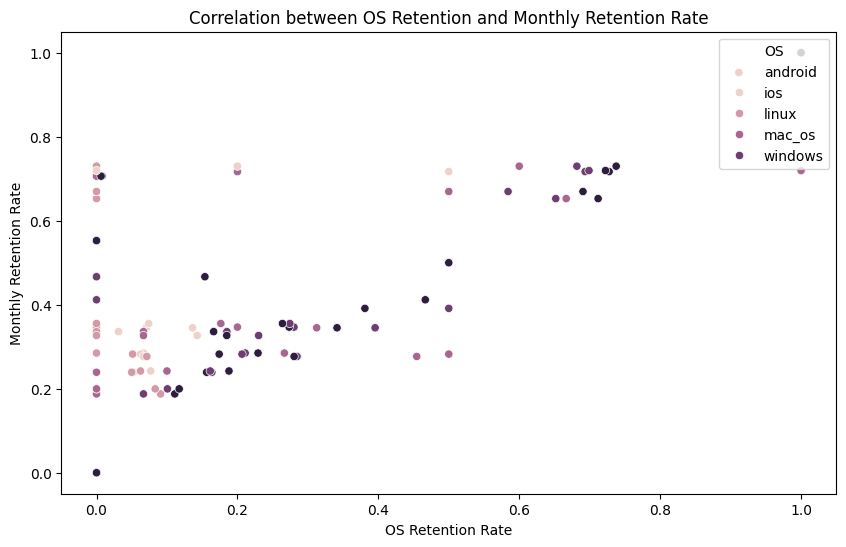

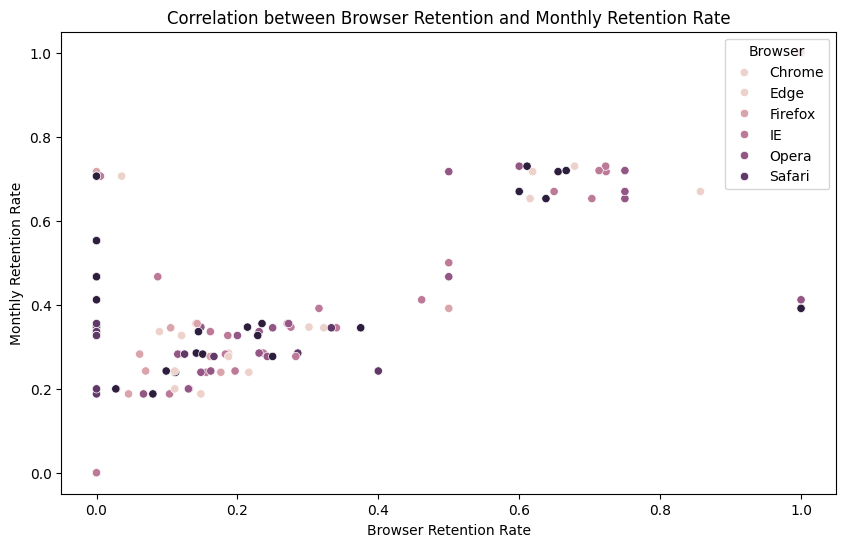

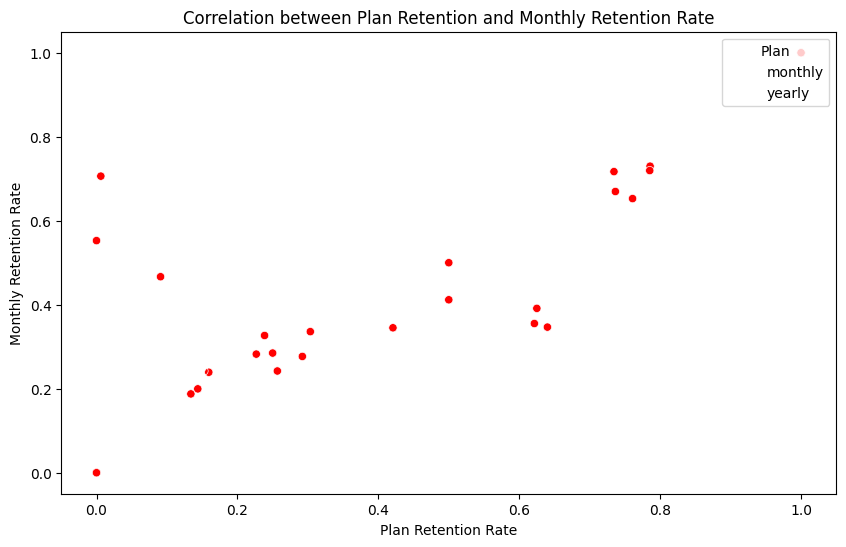

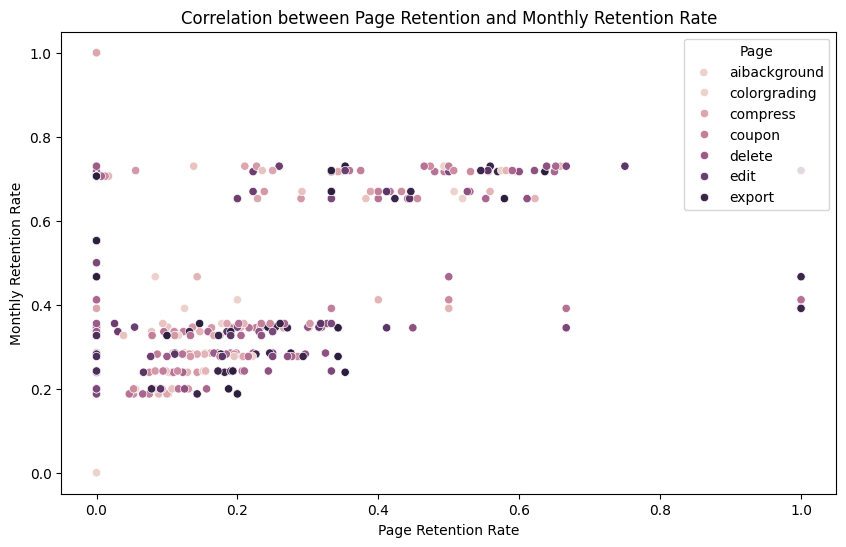

page            0      1       2      3      4       5       6       7   \
month                                                                     
2018-05-01     0.0    0.0     0.0    1.0    0.0     0.0     0.0     0.0   
2018-06-01     0.0    0.0     0.0    1.0    0.0     0.0     0.0     0.0   
2018-08-01     0.0    0.0     4.0    0.0    0.0     0.0     0.0     0.0   
2018-09-01     0.0    0.0     5.0    0.0    0.0     0.0     0.0     0.0   
2018-10-01     1.0    0.0     0.0    0.0    0.0     0.0     0.0     0.0   
2018-11-01     0.0    0.0     0.0    0.0    0.0     0.0     1.0     0.0   
2019-09-01    11.0    3.0    14.0    1.0    0.0     6.0    24.0     5.0   
2019-10-01    27.0    8.0    25.0   12.0    2.0     5.0    11.0    72.0   
2019-11-01    36.0    6.0    29.0    1.0    1.0    25.0    21.0    88.0   
2019-12-01    38.0    7.0    37.0    3.0    0.0     1.0    14.0    50.0   
2020-01-01   697.0  162.0   377.0   67.0   39.0   124.0   250.0   216.0   
2020-02-01   774.0  187.0

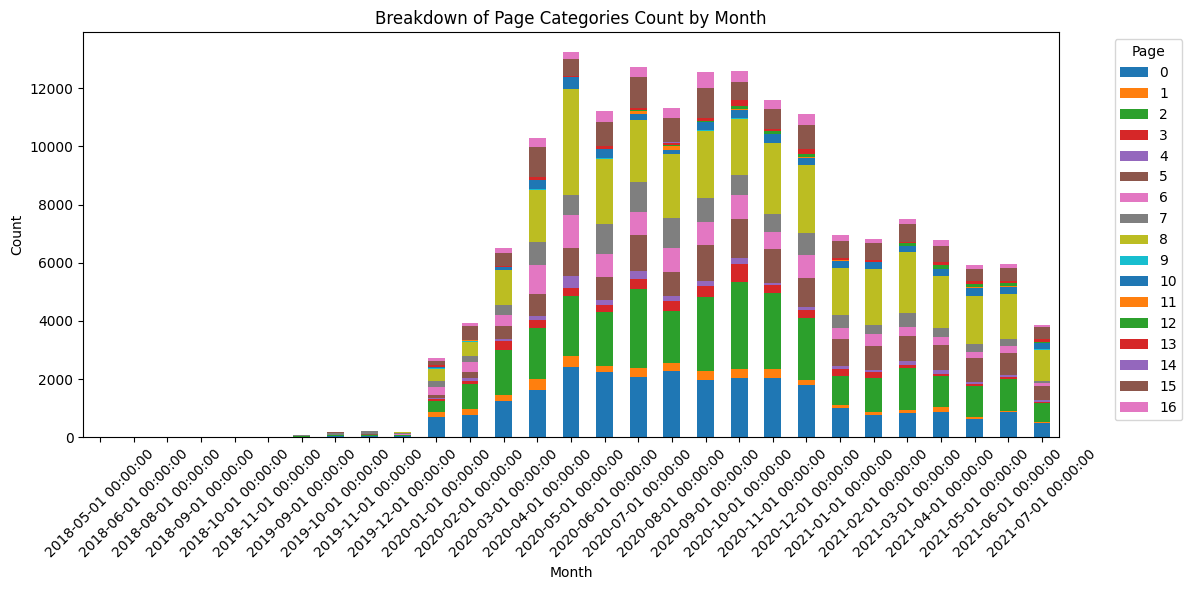

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month from the timestamp
df['month'] = df['ts'].dt.to_period('M').apply(lambda r: r.start_time)
df.dropna(inplace=True)

# Calculate monthly active users (MAU)
mau = df.groupby('month')['user_id'].unique().reset_index(name='active_users')

# Initialize a list to store monthly retention rates
monthly_retention = []

# Calculate monthly retention rates
for i in range(len(mau) - 1):
    current_month = mau.loc[i, 'month']
    next_month = mau.loc[i + 1, 'month']
    
    current_users = set(mau.loc[i, 'active_users'])
    next_users = set(mau.loc[i + 1, 'active_users'])
    
    retained_users = len(current_users & next_users)
    retention_rate = retained_users / len(current_users)
    
    monthly_retention.append(retention_rate)

# Add a NaN value for the last month which cannot have a retention rate
monthly_retention.append(None)

# Create a new column for monthly retention in the original DataFrame
df['monthly_retention_rate'] = df['month'].map(dict(zip(mau['month'], monthly_retention)))

# Display the DataFrame with the new column
print(df.head())

# Initialize label encoders
le_os = LabelEncoder()
le_browser = LabelEncoder()
le_plan = LabelEncoder()
le_page = LabelEncoder()

# Fit and transform the categorical columns
df['os'] = le_os.fit_transform(df['os'])
df['browser'] = le_browser.fit_transform(df['browser'])
df['plan'] = le_plan.fit_transform(df['plan'])
df['page'] = le_page.fit_transform(df['page'])

# Display the encoded DataFrame
print(df.head())

# Calculate retention rate for each attribute
def calculate_attribute_retention(df, attribute):
    attribute_retention = []
    unique_months = df['month'].unique()
    
    for i in range(len(unique_months) - 1):
        current_month = unique_months[i]
        next_month = unique_months[i + 1]
        
        current_users = df[df['month'] == current_month].groupby(attribute)['user_id'].unique()
        next_users = df[df['month'] == next_month].groupby(attribute)['user_id'].unique()
        
        retention_rate = {}
        for attr in current_users.index:
            if attr in next_users.index:
                retained_users = len(set(current_users[attr]) & set(next_users[attr]))
                retention_rate[attr] = retained_users / len(current_users[attr])
            else:
                retention_rate[attr] = 0
        
        attribute_retention.append((current_month, retention_rate))
    
    return attribute_retention

# Calculate retention for 'os', 'browser', 'plan', and 'page'
os_retention = calculate_attribute_retention(df, 'os')
browser_retention = calculate_attribute_retention(df, 'browser')
plan_retention = calculate_attribute_retention(df, 'plan')
page_retention = calculate_attribute_retention(df, 'page')

# Convert the results to DataFrames for easier manipulation
os_retention_df = pd.DataFrame(os_retention, columns=['month', 'os_retention']).set_index('month')
browser_retention_df = pd.DataFrame(browser_retention, columns=['month', 'browser_retention']).set_index('month')
plan_retention_df = pd.DataFrame(plan_retention, columns=['month', 'plan_retention']).set_index('month')
page_retention_df = pd.DataFrame(page_retention, columns=['month', 'page_retention']).set_index('month')

# Flatten the retention dictionaries for correlation calculation
def flatten_retention_df(retention_df, attribute):
    flattened_data = []
    for month, retention in retention_df.iterrows():
        for attr, rate in retention[0].items():
            flattened_data.append((month, attr, rate))
    return pd.DataFrame(flattened_data, columns=['month', attribute, 'retention_rate'])

# Flatten the DataFrames
flat_os_retention = flatten_retention_df(os_retention_df, 'os')
flat_browser_retention = flatten_retention_df(browser_retention_df, 'browser')
flat_plan_retention = flatten_retention_df(plan_retention_df, 'plan')
flat_page_retention = flatten_retention_df(page_retention_df, 'page')

# Merge with the main DataFrame to get monthly retention rates
merged_df = df[['month', 'monthly_retention_rate']].drop_duplicates().set_index('month')
merged_os_df = flat_os_retention.merge(merged_df, on='month')
merged_browser_df = flat_browser_retention.merge(merged_df, on='month')
merged_plan_df = flat_plan_retention.merge(merged_df, on='month')
merged_page_df = flat_page_retention.merge(merged_df, on='month')

# Calculate correlation coefficients for each attribute
def calculate_correlation(df, attribute):
    correlation_values = {}
    for attr in df[attribute].unique():
        subset = df[df[attribute] == attr]
        correlation = subset.corr()['monthly_retention_rate']['retention_rate']
        correlation_values[attr] = correlation
    return correlation_values

os_correlation = calculate_correlation(merged_os_df, 'os')
browser_correlation = calculate_correlation(merged_browser_df, 'browser')
plan_correlation = calculate_correlation(merged_plan_df, 'plan')
page_correlation = calculate_correlation(merged_page_df, 'page')

# Display the correlation coefficients
print("OS Correlation with Monthly Retention Rate:", os_correlation)
print("Browser Correlation with Monthly Retention Rate:", browser_correlation)
print("Plan Correlation with Monthly Retention Rate:", plan_correlation)
print("Page Correlation with Monthly Retention Rate:", page_correlation)

# Scatter plot for OS retention correlation with decoded values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='retention_rate', y='monthly_retention_rate', hue='os', data=merged_os_df)
plt.title('Correlation between OS Retention and Monthly Retention Rate')
plt.xlabel('OS Retention Rate')
plt.ylabel('Monthly Retention Rate')
plt.legend(title='OS', loc='upper right', labels=le_os.inverse_transform(merged_os_df['os'].unique()))
plt.show()

# Scatter plot for Browser retention correlation with decoded values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='retention_rate', y='monthly_retention_rate', hue='browser', data=merged_browser_df)
plt.title('Correlation between Browser Retention and Monthly Retention Rate')
plt.xlabel('Browser Retention Rate')
plt.ylabel('Monthly Retention Rate')
plt.legend(title='Browser', loc='upper right', labels=le_browser.inverse_transform(merged_browser_df['browser'].unique()))
plt.show()

# Scatter plot for Plan retention correlation with decoded values
plt.figure(figsize=(10, 6))
colors={1:'red',2:'blue'}
sns.scatterplot(x='retention_rate', y='monthly_retention_rate', hue='plan', data=merged_plan_df,palette=colors)
plt.title('Correlation between Plan Retention and Monthly Retention Rate')
plt.xlabel('Plan Retention Rate')
plt.ylabel('Monthly Retention Rate')
plt.legend(title='Plan', loc='upper right', labels=le_plan.inverse_transform(merged_plan_df['plan'].unique()))
plt.show()

# Scatter plot for Page retention correlation with decoded values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='retention_rate', y='monthly_retention_rate', hue='page', data=merged_page_df)
plt.title('Correlation between Page Retention and Monthly Retention Rate')
plt.xlabel('Page Retention Rate')
plt.ylabel('Monthly Retention Rate')
plt.legend(title='Page', loc='upper right', labels=le_page.inverse_transform(merged_page_df['page'].unique()))
plt.show()

# Create a mapping dictionary for decoding
page_mapping = dict(zip(le_page.classes_, le_page.transform(le_page.classes_)))
# Calculate the count of each page category for each month
page_counts = df.groupby(['month', 'page']).size().reset_index(name='count')

# Pivot the data to get counts of pages as columns
page_counts_pivot = page_counts.pivot(index='month', columns='page', values='count').fillna(0)

# Display the pivot table
print(page_counts_pivot)
# Plot the stacked bar chart
page_counts_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Breakdown of Page Categories Count by Month')
plt.xticks(rotation=45)
plt.legend(title='Page', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
4           4 2020-01-19 02:23:02  212955203693754102065312977639302287127   

        os  browser     plan      page      month  page_encoded  
0   mac_os  Firefox  monthly     merge 2020-01-01             8  
1   mac_os  Firefox  monthly    delete 2020-01-01             4  
2  windows  Firefox  monthly    export 2020-01-01             6  
3  windows  Firefox  monthly    rotate 2020-01-01            13  
4  windows  Firefox  monthly  compress 2020-01-01             2  
            aibackground  colorgrading  compress  coupon  delete    edit  \
month                                                      

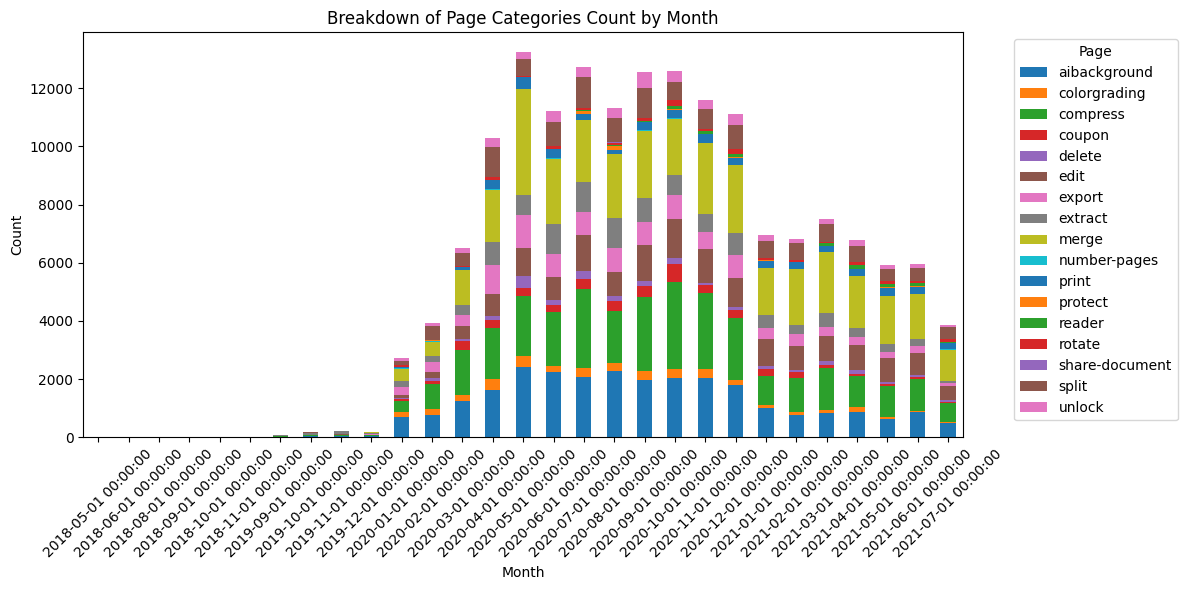

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month from the timestamp
df['month'] = df['ts'].dt.to_period('M').apply(lambda r: r.start_time)

# Initialize the label encoder
le_page = LabelEncoder()

# Fit and transform the page column
df['page_encoded'] = le_page.fit_transform(df['page'])

# Display the DataFrame with the encoded page column
print(df.head())

# Calculate the count of each page category for each month
page_counts = df.groupby(['month', 'page_encoded']).size().reset_index(name='count')

# Pivot the data to get counts of pages as columns
page_counts_pivot = page_counts.pivot(index='month', columns='page_encoded', values='count').fillna(0)

# Decode the page column names
page_counts_pivot.columns = le_page.inverse_transform(page_counts_pivot.columns)

# Display the pivot table
print(page_counts_pivot)

# Plot the stacked bar chart
page_counts_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Breakdown of Page Categories Count by Month')
plt.xticks(rotation=45)
plt.legend(title='Page', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


   os_encoded  browser_encoded  plan_encoded  page_encoded
0           3                2             0             8
1           3                2             0             4
2           4                2             0             6
3           4                2             0            13
4           4                2             0             2
                 os_encoded  browser_encoded  plan_encoded  page_encoded
os_encoded         1.000000        -0.458860      0.028205      0.055416
browser_encoded   -0.458860         1.000000      0.034811     -0.036632
plan_encoded       0.028205         0.034811      1.000000     -0.048053
page_encoded       0.055416        -0.036632     -0.048053      1.000000


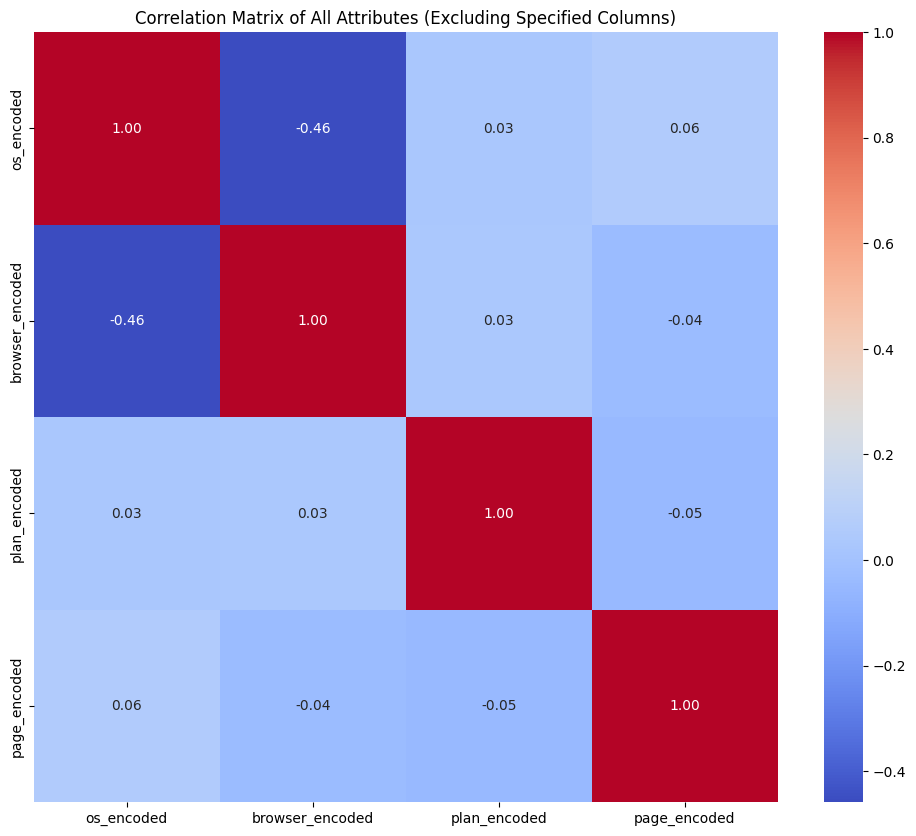

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month from the timestamp
df['month'] = df['ts'].dt.to_period('M').apply(lambda r: r.start_time)

# Initialize label encoders
le_os = LabelEncoder()
le_browser = LabelEncoder()
le_plan = LabelEncoder()
le_page = LabelEncoder()

# Fit and transform the categorical columns
df['os_encoded'] = le_os.fit_transform(df['os'])
df['browser_encoded'] = le_browser.fit_transform(df['browser'])
df['plan_encoded'] = le_plan.fit_transform(df['plan'])
df['page_encoded'] = le_page.fit_transform(df['page'])

# Drop the original categorical columns and unnecessary columns
df_encoded = df.drop(columns=['os', 'browser', 'plan', 'page', 'user_id', 'ts', 'Unnamed: 0', 'month'])

# Display the DataFrame with encoded columns
print(df_encoded.head())

# Generate the correlation matrix
corr_matrix = df_encoded.corr()

# Display the correlation matrix
print(corr_matrix)

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Attributes (Excluding Specified Columns)')
plt.show()


In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import statsmodels.api as sm

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month from the timestamp
df['month'] = df['ts'].dt.to_period('M').apply(lambda r: r.start_time)

# Calculate monthly active users (MAU)
mau = df.groupby('month')['user_id'].unique().reset_index(name='active_users')

# Initialize a list to store monthly retention rates
monthly_retention = []

# Calculate monthly retention rates
for i in range(len(mau) - 1):
    current_month = mau.loc[i, 'month']
    next_month = mau.loc[i + 1, 'month']
    
    current_users = set(mau.loc[i, 'active_users'])
    next_users = set(mau.loc[i + 1, 'active_users'])
    
    retained_users = len(current_users & next_users)
    retention_rate = retained_users / len(current_users)
    
    monthly_retention.append(retention_rate)

# Add a NaN value for the last month which cannot have a retention rate
monthly_retention.append(None)

# Create a new column for monthly retention in the original DataFrame
df['monthly_retention_rate'] = df['month'].map(dict(zip(mau['month'], monthly_retention)))

# Display the DataFrame with the new column
print(df.head())

# Initialize label encoders
le_os = LabelEncoder()
le_browser = LabelEncoder()
le_plan = LabelEncoder()
le_page = LabelEncoder()

# Fit and transform the categorical columns
df['os_encoded'] = le_os.fit_transform(df['os'])
df['browser_encoded'] = le_browser.fit_transform(df['browser'])
df['plan_encoded'] = le_plan.fit_transform(df['plan'])
df['page_encoded'] = le_page.fit_transform(df['page'])

# Display the DataFrame with encoded columns
print(df.head())

# Prepare data for chi-square test
chi2_data = df[['monthly_retention_rate', 'os_encoded', 'browser_encoded', 'plan_encoded', 'page_encoded']].dropna()

# Display the data prepared for chi-square test
print(chi2_data.head())

# Perform chi-square test for each attribute
chi2_results = {}
for col in ['os_encoded', 'browser_encoded', 'plan_encoded', 'page_encoded']:
    contingency_table = pd.crosstab(chi2_data[col], chi2_data['monthly_retention_rate'] > 0.5)
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[col] = {'chi2': chi2, 'p_value': p, 'dof': dof}

# Display chi-square test results
for key, value in chi2_results.items():
    print(f"Attribute: {key}, Chi2: {value['chi2']}, P-value: {value['p_value']}, DOF: {value['dof']}")

# Prepare data for regression analysis
X = df[['os_encoded', 'browser_encoded', 'plan_encoded', 'page_encoded']]
y = df['monthly_retention_rate'].dropna()

# Ensure that the indices of X and y are aligned
X = X.loc[y.index]

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Display the data prepared for regression analysis
print(X.head())
print(y.head())

# Perform regression analysis
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())


   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
4           4 2020-01-19 02:23:02  212955203693754102065312977639302287127   

        os  browser     plan      page      month  monthly_retention_rate  
0   mac_os  Firefox  monthly     merge 2020-01-01                0.187643  
1   mac_os  Firefox  monthly    delete 2020-01-01                0.187643  
2  windows  Firefox  monthly    export 2020-01-01                0.187643  
3  windows  Firefox  monthly    rotate 2020-01-01                0.187643  
4  windows  Firefox  monthly  compress 2020-01-01                0.187643  
   Unnamed: 0                  ts                                  user_id 

In [27]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 6.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 7.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
4           4 2020-01-19 02:23:02  212955203693754102065312977639302287127   

        os  browser     plan      page      month  monthly_retention_rate  
0   mac_os  Firefox  monthly     merge 2020-01-01                0.187643  
1   mac_os  Firefox  monthly    delete 2020-01-01                0.187643  
2  windows  Firefox  monthly    export 2020-01-01                0.187643  
3  windows  Firefox  monthly    rotate 2020-01-01                0.187643  
4  windows  Firefox  monthly  compress 2020-01-01                0.187643  
   Unnamed: 0                  ts                                  user_id 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Decision Tree Classification Report:
               precision    recall  f1-score   support

       False       0.76      0.99      0.86     37296
        True       0.58      0.05      0.10     11982

    accuracy                           0.76     49278
   macro avg       0.67      0.52      0.48     49278
weighted avg       0.72      0.76      0.68     49278

Decision Tree Confusion Matrix:
 [[36843   453]
 [11354   628]]
Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.76      0.99      0.86     37296
        True       0.58      0.05      0.10     11982

    accuracy                           0.76     49278
   macro avg       0.67      0.52      0.48     49278
weighted avg       0.72      0.76      0.68     49278

Random Forest Confusion Matrix:
 [[36835   461]
 [11346   636]]
Linear Regression Mean Squared Error: 0.031083889152468177
Linear Regression R-squared: 0.012614918748641402
Gradient Boosting Mean Squared Er

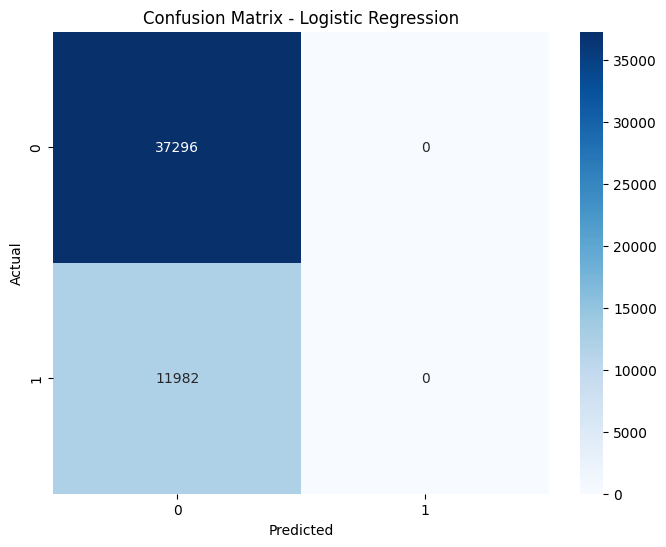

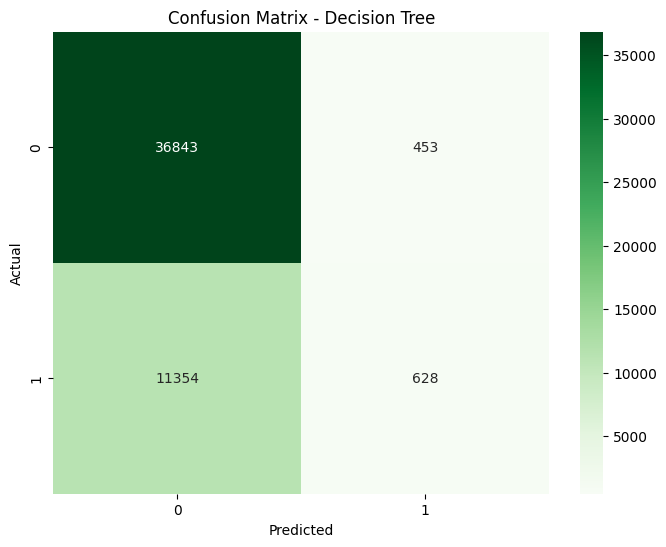

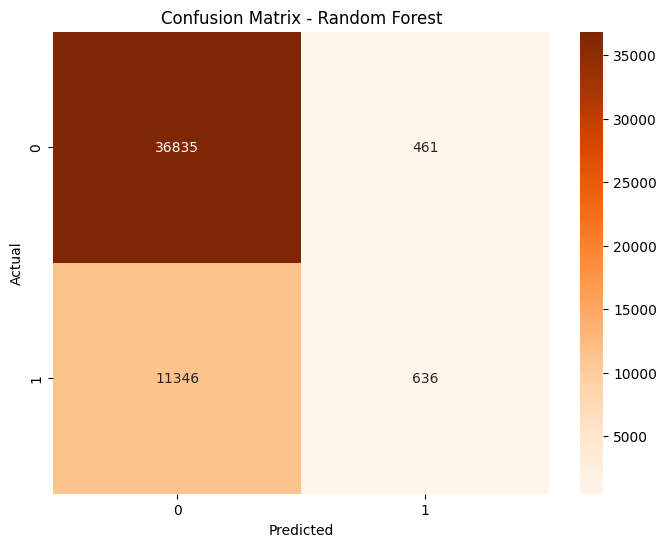

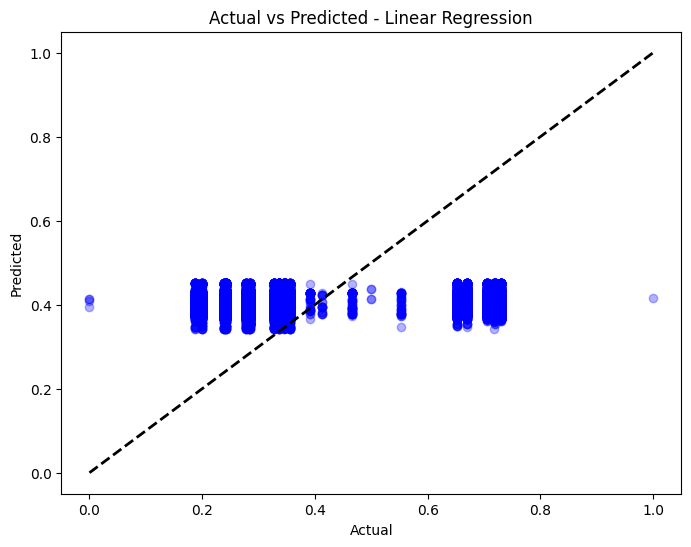

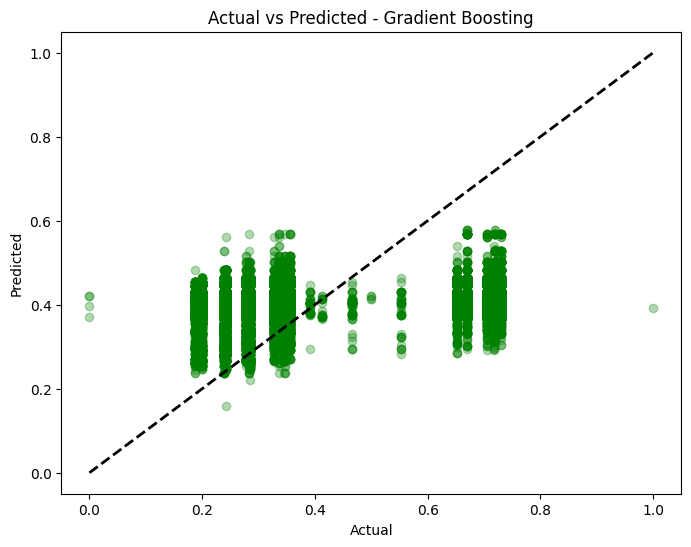

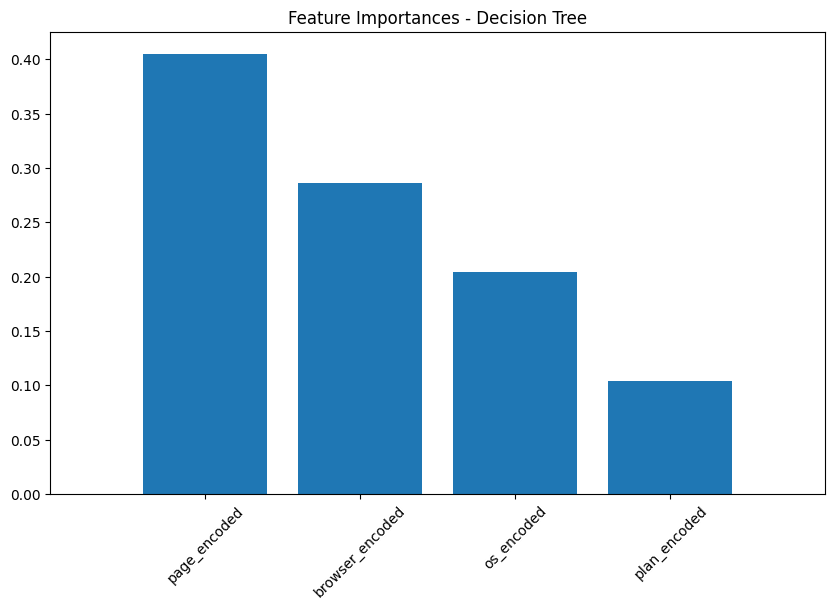

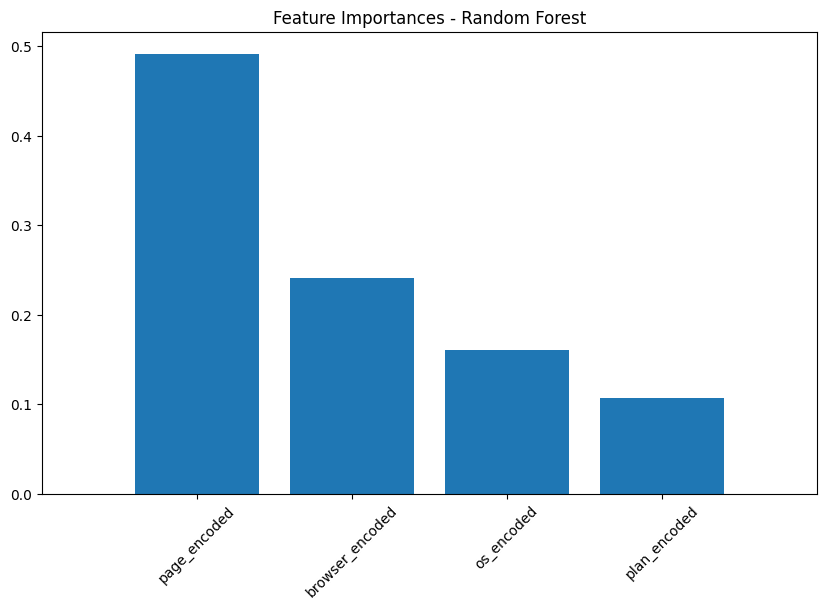

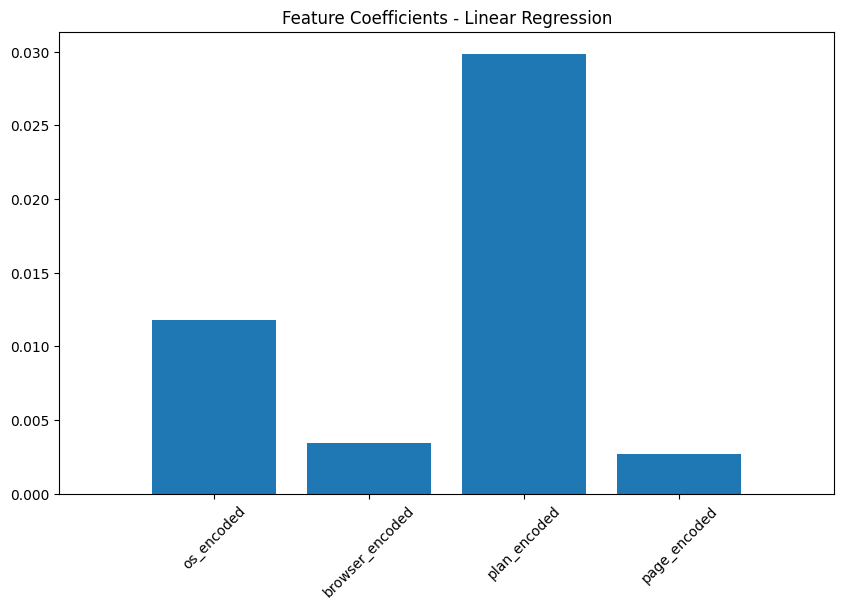

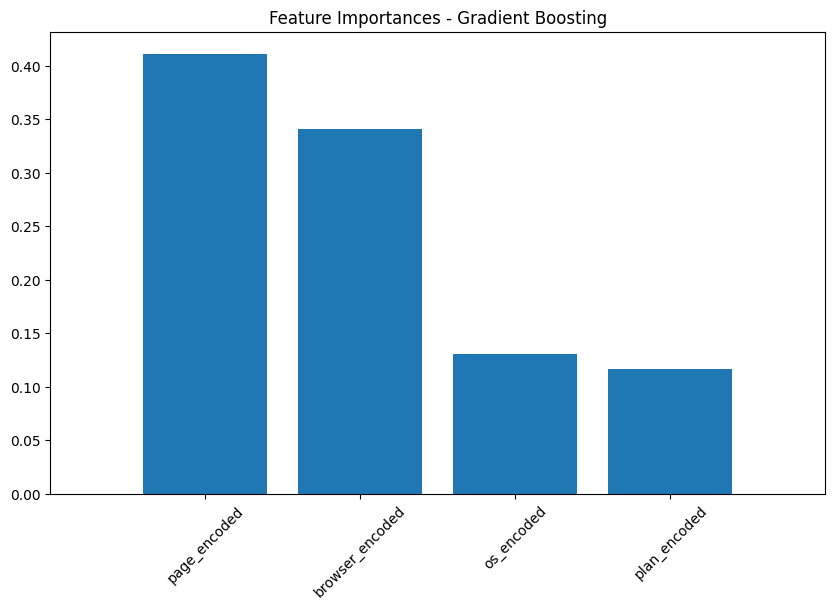

Attribute: os_encoded, Chi2: 607.2031308324227, P-value: 4.2780669172319305e-130, DOF: 4
Attribute: browser_encoded, Chi2: 1960.2250312318822, P-value: 0.0, DOF: 5
Attribute: plan_encoded, Chi2: 999.108497687248, P-value: 2.8057337179367472e-219, DOF: 1
Attribute: page_encoded, Chi2: 3084.3287851254204, P-value: 0.0, DOF: 16


In [31]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month from the timestamp
df['month'] = df['ts'].dt.to_period('M').apply(lambda r: r.start_time)

# Calculate monthly active users (MAU)
mau = df.groupby('month')['user_id'].unique().reset_index(name='active_users')

# Initialize a list to store monthly retention rates
monthly_retention = []

# Calculate monthly retention rates
for i in range(len(mau) - 1):
    current_month = mau.loc[i, 'month']
    next_month = mau.loc[i + 1, 'month']
    
    current_users = set(mau.loc[i, 'active_users'])
    next_users = set(mau.loc[i + 1, 'active_users'])
    
    retained_users = len(current_users & next_users)
    retention_rate = retained_users / len(current_users)
    
    monthly_retention.append(retention_rate)

# Add a NaN value for the last month which cannot have a retention rate
monthly_retention.append(None)

# Create a new column for monthly retention in the original DataFrame
df['monthly_retention_rate'] = df['month'].map(dict(zip(mau['month'], monthly_retention)))

# Display the DataFrame with the new column
print(df.head())

from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
le_os = LabelEncoder()
le_browser = LabelEncoder()
le_plan = LabelEncoder()
le_page = LabelEncoder()

# Fit and transform the categorical columns
df['os_encoded'] = le_os.fit_transform(df['os'])
df['browser_encoded'] = le_browser.fit_transform(df['browser'])
df['plan_encoded'] = le_plan.fit_transform(df['plan'])
df['page_encoded'] = le_page.fit_transform(df['page'])

# Display the DataFrame with encoded columns
print(df.head())

from sklearn.model_selection import train_test_split

# Classification target: predicting if a user will be retained
df['retained'] = df['monthly_retention_rate'] > 0.5

# Prepare features and target for classification
X_class = df[['os_encoded', 'browser_encoded', 'plan_encoded', 'page_encoded']]
y_class = df['retained'].dropna()

# Split the data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class.loc[y_class.index], y_class, test_size=0.3, random_state=42)

# Prepare features and target for regression
X_reg = df[['os_encoded', 'browser_encoded', 'plan_encoded', 'page_encoded']]
y_reg = df['monthly_retention_rate'].dropna()

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg.loc[y_reg.index], y_reg, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_class, y_train_class)

# Generate predictions
y_pred_class_log_reg = log_reg.predict(X_test_class)

# Display classification report and confusion matrix
print("Logistic Regression Classification Report:\n", classification_report(y_test_class, y_pred_class_log_reg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_class_log_reg))

from sklearn.tree import DecisionTreeClassifier

# Train decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train_class, y_train_class)

# Generate predictions
y_pred_class_dt = dt.predict(X_test_class)

# Display classification report and confusion matrix
print("Decision Tree Classification Report:\n", classification_report(y_test_class, y_pred_class_dt))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_class_dt))

from sklearn.ensemble import RandomForestClassifier

# Train random forest model
rf = RandomForestClassifier()
rf.fit(X_train_class, y_train_class)

# Generate predictions
y_pred_class_rf = rf.predict(X_test_class)

# Display classification report and confusion matrix
print("Random Forest Classification Report:\n", classification_report(y_test_class, y_pred_class_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_class_rf))

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

# Generate predictions
y_pred_reg_lin = lin_reg.predict(X_test_reg)

# Display regression metrics
print("Linear Regression Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg_lin))
print("Linear Regression R-squared:", r2_score(y_test_reg, y_pred_reg_lin))

from sklearn.ensemble import GradientBoostingRegressor

# Train gradient boosting model
gb = GradientBoostingRegressor()
gb.fit(X_train_reg, y_train_reg)

# Generate predictions
y_pred_reg_gb = gb.predict(X_test_reg)

# Display regression metrics
print("Gradient Boosting Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg_gb))
print("Gradient Boosting R-squared:", r2_score(y_test_reg, y_pred_reg_gb))

import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_class, y_pred_class_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_class, y_pred_class_dt), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_class, y_pred_class_rf), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot actual vs predicted for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg_lin, alpha=0.3, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Linear Regression')
plt.show()

# Plot actual vs predicted for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg_gb, alpha=0.3, color='green')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Gradient Boosting')
plt.show()


import numpy as np
import matplotlib.pyplot as plt

# Feature importance from Decision Tree
feature_importances_dt = dt.feature_importances_
indices_dt = np.argsort(feature_importances_dt)[::-1]
features_dt = X_train_class.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Decision Tree")
plt.bar(range(X_train_class.shape[1]), feature_importances_dt[indices_dt], align="center")
plt.xticks(range(X_train_class.shape[1]), features_dt[indices_dt], rotation=45)
plt.xlim([-1, X_train_class.shape[1]])
plt.show()

# Feature importance from Random Forest
feature_importances_rf = rf.feature_importances_
indices_rf = np.argsort(feature_importances_rf)[::-1]
features_rf = X_train_class.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X_train_class.shape[1]), feature_importances_rf[indices_rf], align="center")
plt.xticks(range(X_train_class.shape[1]), features_rf[indices_rf], rotation=45)
plt.xlim([-1, X_train_class.shape[1]])
plt.show()

# Coefficients from Linear Regression
coefficients_lin = lin_reg.coef_
features_lin = X_train_reg.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Coefficients - Linear Regression")
plt.bar(range(X_train_reg.shape[1]), coefficients_lin, align="center")
plt.xticks(range(X_train_reg.shape[1]), features_lin, rotation=45)
plt.xlim([-1, X_train_reg.shape[1]])
plt.show()

# Coefficients from Gradient Boosting
feature_importances_gb = gb.feature_importances_
indices_gb = np.argsort(feature_importances_gb)[::-1]
features_gb = X_train_reg.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Gradient Boosting")
plt.bar(range(X_train_reg.shape[1]), feature_importances_gb[indices_gb], align="center")
plt.xticks(range(X_train_reg.shape[1]), features_gb[indices_gb], rotation=45)
plt.xlim([-1, X_train_reg.shape[1]])
plt.show()

from scipy.stats import chi2_contingency

# Perform chi-square test for each attribute
chi2_results = {}
for col in ['os_encoded', 'browser_encoded', 'plan_encoded', 'page_encoded']:
    contingency_table = pd.crosstab(df[col], df['retained'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[col] = {'chi2': chi2, 'p_value': p, 'dof': dof}

# Display chi-square test results
for key, value in chi2_results.items():
    print(f"Attribute: {key}, Chi2: {value['chi2']}, P-value: {value['p_value']}, DOF: {value['dof']}")



In [34]:
#Churn of trial customers

import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the day from the timestamp
df['day'] = df['ts'].dt.date

# Assuming we have a signup date column
df['signup_date'] = df.groupby('user_id')['ts'].transform('min')

# Calculate the days since signup
df['days_since_signup'] = (df['ts'] - df['signup_date']).dt.days

# Identify trial customers (within 7 days of signup)
trial_customers = df[df['days_since_signup'] <= 7]

# Display the trial customers DataFrame
print(trial_customers.head())

# Identify unique trial customers
unique_trial_customers = trial_customers['user_id'].unique()

# Identify customers who stayed after trial (used the service after 7 days)
post_trial_customers = df[df['days_since_signup'] > 7]['user_id'].unique()

# Calculate churn rate
trial_customer_set = set(unique_trial_customers)
post_trial_customer_set = set(post_trial_customers)

churned_customers = trial_customer_set - post_trial_customer_set
churn_rate = len(churned_customers) / len(trial_customer_set)

print(f"Churn Rate of Trial Customers: {churn_rate * 100:.2f}%")


   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
5           5 2020-03-02 21:03:22  306450168057320033204057377118043185554   

        os  browser     plan    page         day         signup_date  \
0   mac_os  Firefox  monthly   merge  2020-01-02 2020-01-02 02:22:49   
1   mac_os  Firefox  monthly  delete  2020-01-03 2020-01-02 02:22:49   
2  windows  Firefox  monthly  export  2020-01-05 2020-01-05 02:21:25   
3  windows  Firefox  monthly  rotate  2020-01-05 2020-01-05 02:21:25   
5  windows   Chrome  monthly    edit  2020-03-02 2020-02-27 01:20:38   

   days_since_signup  
0                  0  
1                  1  
2                  0  
3     

In [35]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the day from the timestamp
df['day'] = df['ts'].dt.date

# Assuming we have a signup date column
df['signup_date'] = df.groupby('user_id')['ts'].transform('min')

# Calculate the days since signup
df['days_since_signup'] = (df['ts'] - df['signup_date']).dt.days

# Identify trial customers (within 7 days of signup)
trial_customers = df[df['days_since_signup'] <= 7]

# Display the trial customers DataFrame
print(trial_customers.head())

# Calculate engagement (number of unique actions) for each trial customer
engagement = trial_customers.groupby('user_id')['page'].nunique().reset_index(name='engagement')

# Display the engagement DataFrame
print(engagement.head())

# Calculate the average engagement rate
engagement_rate = engagement['engagement'].mean()

print(f"Engagement Rate of Trial Customers: {engagement_rate:.2f} unique actions")


   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
5           5 2020-03-02 21:03:22  306450168057320033204057377118043185554   

        os  browser     plan    page         day         signup_date  \
0   mac_os  Firefox  monthly   merge  2020-01-02 2020-01-02 02:22:49   
1   mac_os  Firefox  monthly  delete  2020-01-03 2020-01-02 02:22:49   
2  windows  Firefox  monthly  export  2020-01-05 2020-01-05 02:21:25   
3  windows  Firefox  monthly  rotate  2020-01-05 2020-01-05 02:21:25   
5  windows   Chrome  monthly    edit  2020-03-02 2020-02-27 01:20:38   

   days_since_signup  
0                  0  
1                  1  
2                  0  
3     

   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
5           5 2020-03-02 21:03:22  306450168057320033204057377118043185554   

        os  browser     plan    page         day         signup_date  \
0   mac_os  Firefox  monthly   merge  2020-01-02 2020-01-02 02:22:49   
1   mac_os  Firefox  monthly  delete  2020-01-03 2020-01-02 02:22:49   
2  windows  Firefox  monthly  export  2020-01-05 2020-01-05 02:21:25   
3  windows  Firefox  monthly  rotate  2020-01-05 2020-01-05 02:21:25   
5  windows   Chrome  monthly    edit  2020-03-02 2020-02-27 01:20:38   

   days_since_signup  
0                  0  
1                  1  
2                  0  
3     

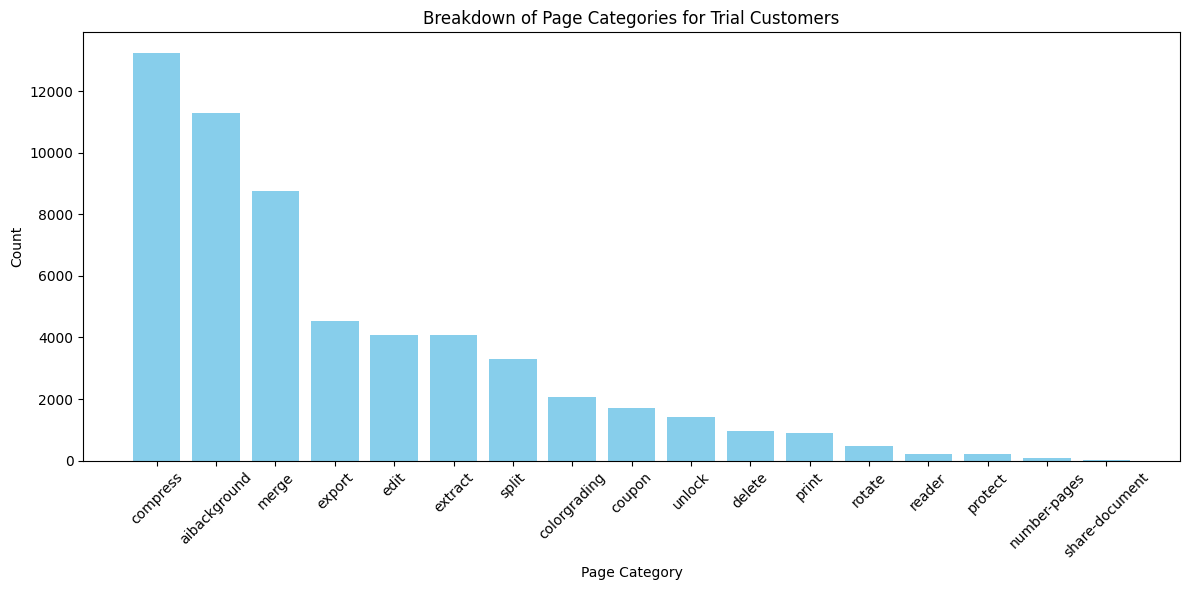

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the day from the timestamp
df['day'] = df['ts'].dt.date

# Assuming we have a signup date column
df['signup_date'] = df.groupby('user_id')['ts'].transform('min')

# Calculate the days since signup
df['days_since_signup'] = (df['ts'] - df['signup_date']).dt.days

# Identify trial customers (within 7 days of signup)
trial_customers = df[df['days_since_signup'] <= 7]

# Display the trial customers DataFrame
print(trial_customers.head())

# Calculate the breakdown of page categories
page_breakdown = trial_customers['page'].value_counts().reset_index(name='count')
page_breakdown.columns = ['page', 'count']

# Display the page breakdown DataFrame
print(page_breakdown)

# Plot the breakdown of page categories for trial customers
plt.figure(figsize=(12, 6))
plt.bar(page_breakdown['page'], page_breakdown['count'], color='skyblue')
plt.xlabel('Page Category')
plt.ylabel('Count')
plt.title('Breakdown of Page Categories for Trial Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
5           5 2020-03-02 21:03:22  306450168057320033204057377118043185554   

        os  browser     plan    page         day         signup_date  \
0   mac_os  Firefox  monthly   merge  2020-01-02 2020-01-02 02:22:49   
1   mac_os  Firefox  monthly  delete  2020-01-03 2020-01-02 02:22:49   
2  windows  Firefox  monthly  export  2020-01-05 2020-01-05 02:21:25   
3  windows  Firefox  monthly  rotate  2020-01-05 2020-01-05 02:21:25   
5  windows   Chrome  monthly    edit  2020-03-02 2020-02-27 01:20:38   

   days_since_signup  
0                  0  
1                  1  
2                  0  
3     

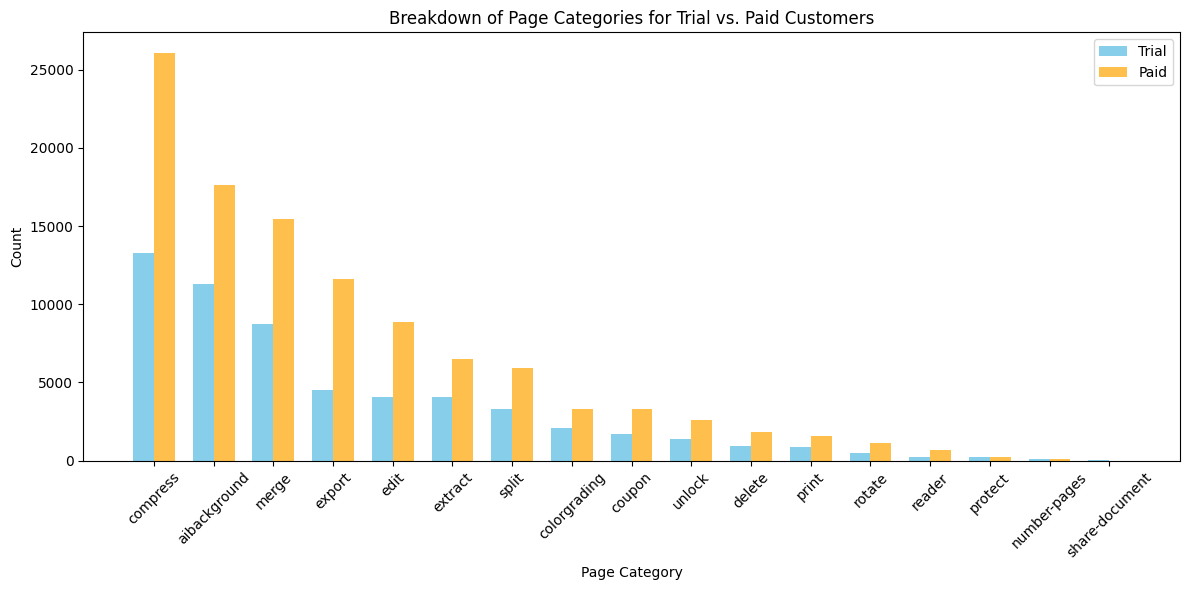

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the day from the timestamp
df['day'] = df['ts'].dt.date

# Assuming we have a signup date column
df['signup_date'] = df.groupby('user_id')['ts'].transform('min')

# Calculate the days since signup
df['days_since_signup'] = (df['ts'] - df['signup_date']).dt.days

# Identify trial customers (within 7 days of signup)
trial_customers = df[df['days_since_signup'] <= 7]

# Identify paid customers (after 7 days of signup)
paid_customers = df[df['days_since_signup'] > 7]

# Display the trial and paid customers DataFrames
print(trial_customers.head())
print(paid_customers.head())

# Calculate the breakdown of page categories for trial customers
page_breakdown_trial = trial_customers['page'].value_counts().reset_index(name='count')
page_breakdown_trial.columns = ['page', 'count']

# Calculate the breakdown of page categories for paid customers
page_breakdown_paid = paid_customers['page'].value_counts().reset_index(name='count')
page_breakdown_paid.columns = ['page', 'count']

# Display the page breakdown DataFrames
print("Page Breakdown for Trial Customers:")
print(page_breakdown_trial)
print("\nPage Breakdown for Paid Customers:")
print(page_breakdown_paid)

# Plot the breakdown of page categories for trial and paid customers
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(page_breakdown_trial))

# Align the bars for side-by-side comparison
plt.bar(index, page_breakdown_trial['count'], bar_width, color='skyblue', label='Trial')
plt.bar([i + bar_width for i in index], page_breakdown_paid['count'], bar_width, color='orange', alpha=0.7, label='Paid')

plt.xlabel('Page Category')
plt.ylabel('Count')
plt.title('Breakdown of Page Categories for Trial vs. Paid Customers')
plt.xticks([i + bar_width / 2 for i in index], page_breakdown_trial['page'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
5           5 2020-03-02 21:03:22  306450168057320033204057377118043185554   

        os  browser     plan    page         day         signup_date  \
0   mac_os  Firefox  monthly   merge  2020-01-02 2020-01-02 02:22:49   
1   mac_os  Firefox  monthly  delete  2020-01-03 2020-01-02 02:22:49   
2  windows  Firefox  monthly  export  2020-01-05 2020-01-05 02:21:25   
3  windows  Firefox  monthly  rotate  2020-01-05 2020-01-05 02:21:25   
5  windows   Chrome  monthly    edit  2020-03-02 2020-02-27 01:20:38   

   days_since_signup  
0                  0  
1                  1  
2                  0  
3     

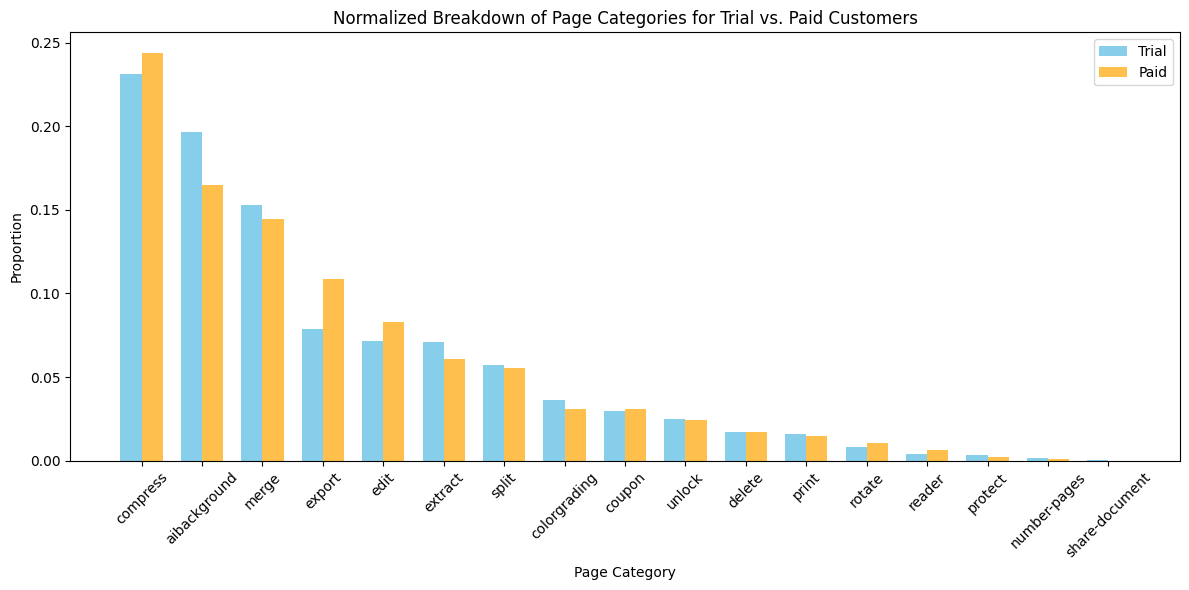

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the day from the timestamp
df['day'] = df['ts'].dt.date

# Assuming we have a signup date column
df['signup_date'] = df.groupby('user_id')['ts'].transform('min')

# Calculate the days since signup
df['days_since_signup'] = (df['ts'] - df['signup_date']).dt.days

# Identify trial customers (within 7 days of signup)
trial_customers = df[df['days_since_signup'] <= 7]

# Identify paid customers (after 7 days of signup)
paid_customers = df[df['days_since_signup'] > 7]

# Display the trial and paid customers DataFrames
print(trial_customers.head())
print(paid_customers.head())

# Calculate the breakdown of page categories for trial customers
page_breakdown_trial = trial_customers['page'].value_counts(normalize=True).reset_index(name='proportion')
page_breakdown_trial.columns = ['page', 'proportion']

# Calculate the breakdown of page categories for paid customers
page_breakdown_paid = paid_customers['page'].value_counts(normalize=True).reset_index(name='proportion')
page_breakdown_paid.columns = ['page', 'proportion']

# Display the normalized page breakdown DataFrames
print("Normalized Page Breakdown for Trial Customers:")
print(page_breakdown_trial)
print("\nNormalized Page Breakdown for Paid Customers:")
print(page_breakdown_paid)

# Plot the normalized breakdown of page categories for trial and paid customers
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(page_breakdown_trial))

# Align the bars for side-by-side comparison
plt.bar(index, page_breakdown_trial['proportion'], bar_width, color='skyblue', label='Trial')
plt.bar([i + bar_width for i in index], page_breakdown_paid['proportion'], bar_width, color='orange', alpha=0.7, label='Paid')

plt.xlabel('Page Category')
plt.ylabel('Proportion')
plt.title('Normalized Breakdown of Page Categories for Trial vs. Paid Customers')
plt.xticks([i + bar_width / 2 for i in index], page_breakdown_trial['page'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Churn Rate: 75.15%
   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
4           4 2020-01-19 02:23:02  212955203693754102065312977639302287127   

        os  browser     plan      page         day         signup_date  \
0   mac_os  Firefox  monthly     merge  2020-01-02 2020-01-02 02:22:49   
1   mac_os  Firefox  monthly    delete  2020-01-03 2020-01-02 02:22:49   
2  windows  Firefox  monthly    export  2020-01-05 2020-01-05 02:21:25   
3  windows  Firefox  monthly    rotate  2020-01-05 2020-01-05 02:21:25   
4  windows  Firefox  monthly  compress  2020-01-19 2020-01-05 02:21:25   

   days_since_signup  browser_encoded  os_encoded  page_encoded  pl

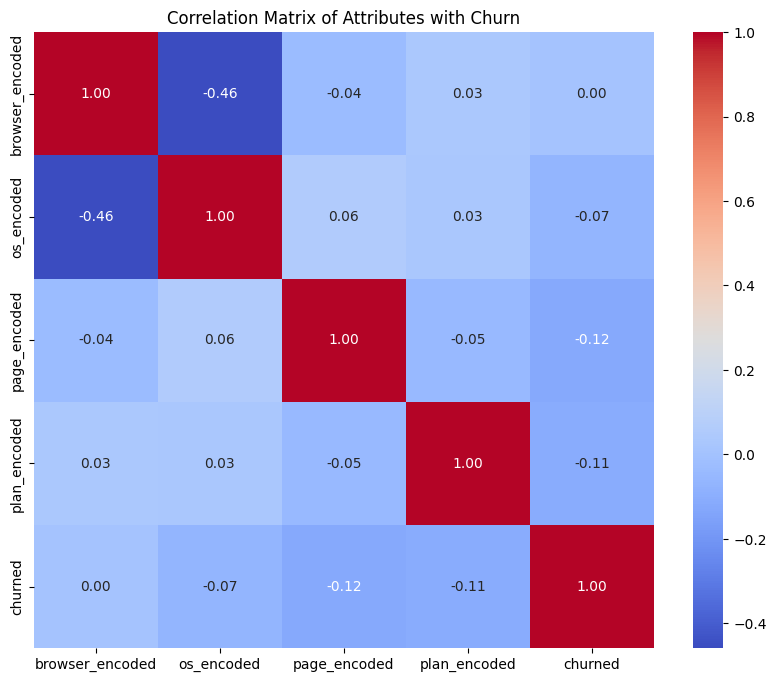

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the day from the timestamp
df['day'] = df['ts'].dt.date

# Assuming we have a signup date column
df['signup_date'] = df.groupby('user_id')['ts'].transform('min')

# Calculate the days since signup
df['days_since_signup'] = (df['ts'] - df['signup_date']).dt.days

# Identify trial customers (within 7 days of signup)
trial_customers = df[df['days_since_signup'] <= 7]

# Identify paid customers (after 7 days of signup)
paid_customers = df[df['days_since_signup'] > 7]

# Identify users who had activity after the trial period
active_after_trial = paid_customers['user_id'].unique()

# Identify churned users (those who did not have activity after the trial period)
trial_users = trial_customers['user_id'].unique()
churned_users = set(trial_users) - set(active_after_trial)

# Calculate churn rate
churn_rate = len(churned_users) / len(trial_users)

print(f"Churn Rate: {churn_rate * 100:.2f}%")

# Initialize label encoders
le_browser = LabelEncoder()
le_os = LabelEncoder()
le_page = LabelEncoder()
le_plan = LabelEncoder()

# Fit and transform the categorical columns
df['browser_encoded'] = le_browser.fit_transform(df['browser'])
df['os_encoded'] = le_os.fit_transform(df['os'])
df['page_encoded'] = le_page.fit_transform(df['page'])
df['plan_encoded'] = le_plan.fit_transform(df['plan'])

# Create a column indicating whether a user has churned
df['churned'] = df['user_id'].apply(lambda x: 1 if x in churned_users else 0)

# Display the DataFrame with encoded columns
print(df.head())

# Calculate the correlation matrix
correlation_matrix = df[['browser_encoded', 'os_encoded', 'page_encoded', 'plan_encoded', 'churned']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Attributes with Churn')
plt.show()


   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
4           4 2020-01-19 02:23:02  212955203693754102065312977639302287127   

        os  browser     plan      page         day         signup_date  \
0   mac_os  Firefox  monthly     merge  2020-01-02 2020-01-02 02:22:49   
1   mac_os  Firefox  monthly    delete  2020-01-03 2020-01-02 02:22:49   
2  windows  Firefox  monthly    export  2020-01-05 2020-01-05 02:21:25   
3  windows  Firefox  monthly    rotate  2020-01-05 2020-01-05 02:21:25   
4  windows  Firefox  monthly  compress  2020-01-19 2020-01-05 02:21:25   

   days_since_signup  churned  
0                  0        0  
1                  1  

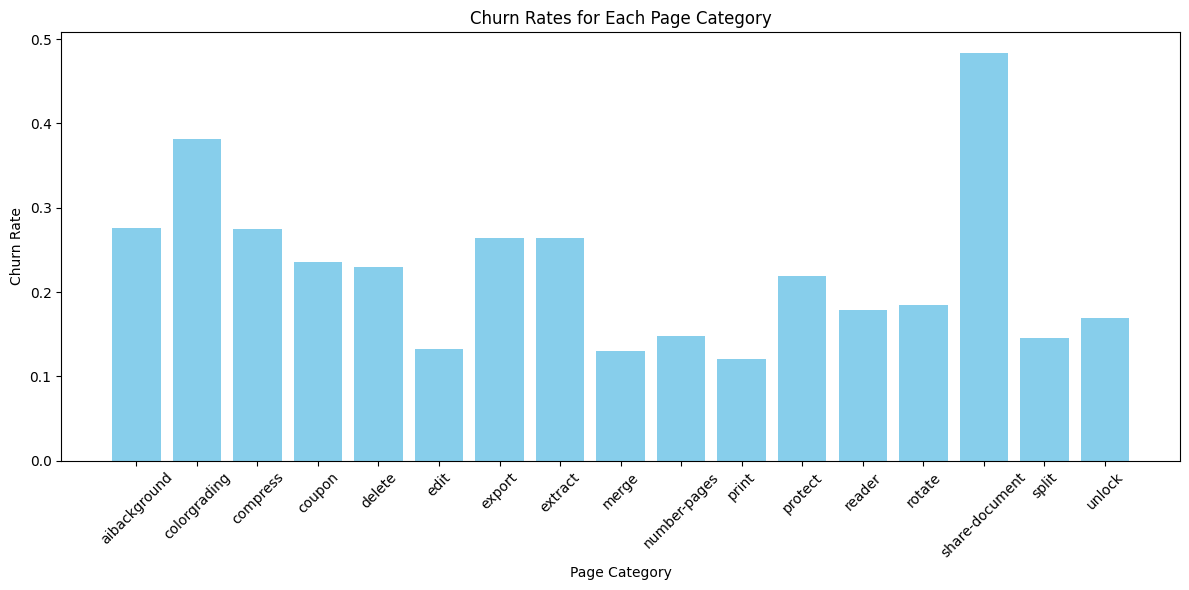

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the day from the timestamp
df['day'] = df['ts'].dt.date

# Assuming we have a signup date column
df['signup_date'] = df.groupby('user_id')['ts'].transform('min')

# Calculate the days since signup
df['days_since_signup'] = (df['ts'] - df['signup_date']).dt.days

# Identify trial customers (within 7 days of signup)
trial_customers = df[df['days_since_signup'] <= 7]

# Identify paid customers (after 7 days of signup)
paid_customers = df[df['days_since_signup'] > 7]

# Identify users who had activity after the trial period
active_after_trial = paid_customers['user_id'].unique()

# Identify churned users (those who did not have activity after the trial period)
trial_users = trial_customers['user_id'].unique()
churned_users = set(trial_users) - set(active_after_trial)

# Create a column indicating whether a user has churned
df['churned'] = df['user_id'].apply(lambda x: 1 if x in churned_users else 0)

# Display the first few rows of the DataFrame
print(df.head())

# Calculate the number of churned users and total users for each page
page_churn_data = df.groupby('page')['churned'].agg(['sum', 'count']).reset_index()
page_churn_data.columns = ['page', 'churned_users', 'total_users']

# Calculate the churn rate for each page
page_churn_data['churn_rate'] = page_churn_data['churned_users'] / page_churn_data['total_users']

# Display the churn rate for each page
print(page_churn_data)

# Plot the churn rates for each page
plt.figure(figsize=(12, 6))
plt.bar(page_churn_data['page'], page_churn_data['churn_rate'], color='skyblue')
plt.xlabel('Page Category')
plt.ylabel('Churn Rate')
plt.title('Churn Rates for Each Page Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
4           4 2020-01-19 02:23:02  212955203693754102065312977639302287127   

        os  browser     plan      page         day         signup_date  \
0   mac_os  Firefox  monthly     merge  2020-01-02 2020-01-02 02:22:49   
1   mac_os  Firefox  monthly    delete  2020-01-03 2020-01-02 02:22:49   
2  windows  Firefox  monthly    export  2020-01-05 2020-01-05 02:21:25   
3  windows  Firefox  monthly    rotate  2020-01-05 2020-01-05 02:21:25   
4  windows  Firefox  monthly  compress  2020-01-19 2020-01-05 02:21:25   

   days_since_signup  retained  
0                  0         1  
1                  1

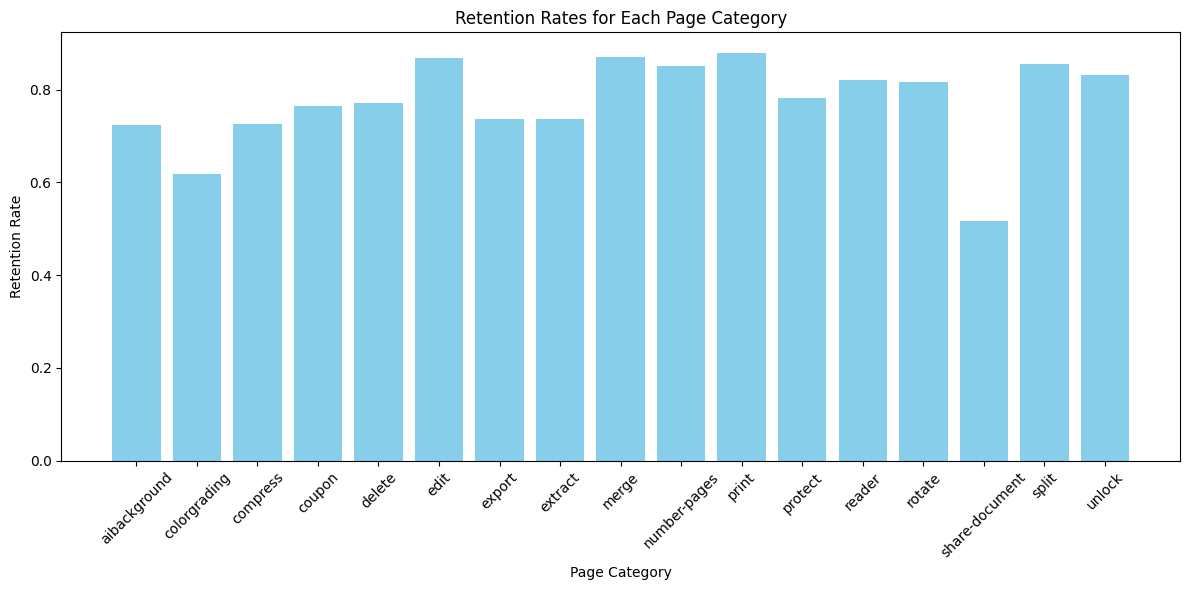

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the day from the timestamp
df['day'] = df['ts'].dt.date

# Assuming we have a signup date column
df['signup_date'] = df.groupby('user_id')['ts'].transform('min')

# Calculate the days since signup
df['days_since_signup'] = (df['ts'] - df['signup_date']).dt.days

# Identify trial customers (within 7 days of signup)
trial_customers = df[df['days_since_signup'] <= 7]

# Identify paid customers (after 7 days of signup)
paid_customers = df[df['days_since_signup'] > 7]

# Identify users who had activity after the trial period
active_after_trial = paid_customers['user_id'].unique()

# Identify retained users (those who had activity after the trial period)
trial_users = trial_customers['user_id'].unique()
retained_users = set(trial_users) & set(active_after_trial)

# Create a column indicating whether a user is retained
df['retained'] = df['user_id'].apply(lambda x: 1 if x in retained_users else 0)

# Display the first few rows of the DataFrame
print(df.head())

# Calculate the number of retained users and total users for each page
page_retention_data = df.groupby('page')['retained'].agg(['sum', 'count']).reset_index()
page_retention_data.columns = ['page', 'retained_users', 'total_users']

# Calculate the retention rate for each page
page_retention_data['retention_rate'] = page_retention_data['retained_users'] / page_retention_data['total_users']

# Display the retention rate for each page
print(page_retention_data)

# Plot the retention rates for each page
plt.figure(figsize=(12, 6))
plt.bar(page_retention_data['page'], page_retention_data['retention_rate'], color='skyblue')
plt.xlabel('Page Category')
plt.ylabel('Retention Rate')
plt.title('Retention Rates for Each Page Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
4           4 2020-01-19 02:23:02  212955203693754102065312977639302287127   

        os  browser     plan      page    month  
0   mac_os  Firefox  monthly     merge  2020-01  
1   mac_os  Firefox  monthly    delete  2020-01  
2  windows  Firefox  monthly    export  2020-01  
3  windows  Firefox  monthly    rotate  2020-01  
4  windows  Firefox  monthly  compress  2020-01  
   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361 

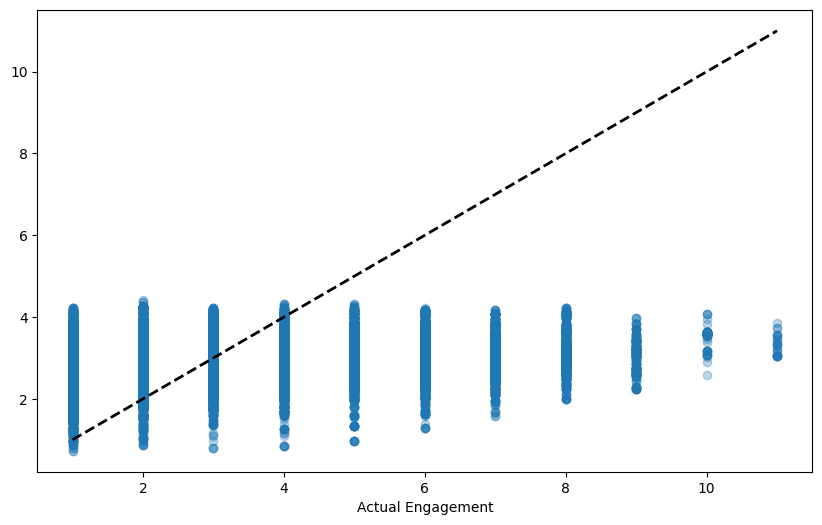

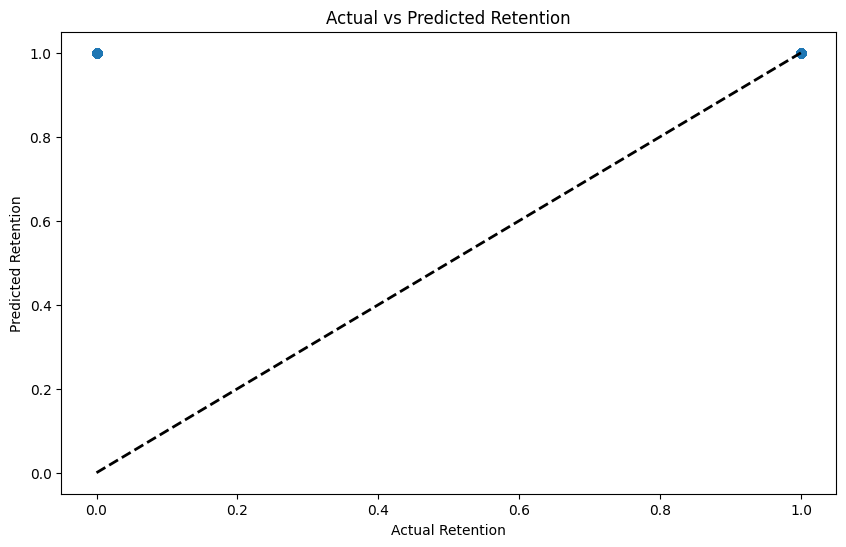

In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)
# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month from the timestamp
df['month'] = df['ts'].dt.to_period('M')

# Display the first few rows of the DataFrame
print(df.head())

# Calculate engagement (number of unique actions) for each user per month
engagement = df.groupby(['user_id', 'month'])['page'].nunique().reset_index(name='engagement')

# Calculate retention (whether user is active in the next month)
df['next_month'] = df['month'].dt.to_timestamp() + pd.DateOffset(months=1)
df['active_next_month'] = df.groupby('user_id')['month'].shift(-1).notna().astype(int)

# Merge engagement data back to the main DataFrame
df = df.merge(engagement, on=['user_id', 'month'], how='left')

# Display the DataFrame with engagement and retention
print(df.head())

# Initialize label encoders
le_browser = LabelEncoder()
le_os = LabelEncoder()
le_plan = LabelEncoder()
le_page = LabelEncoder()

# Fit and transform the categorical columns
df['browser_encoded'] = le_browser.fit_transform(df['browser'])
df['os_encoded'] = le_os.fit_transform(df['os'])
df['plan_encoded'] = le_plan.fit_transform(df['plan'])
df['page_encoded'] = le_page.fit_transform(df['page'])

# Display the DataFrame with encoded columns


# One-hot encode the month column
df = pd.get_dummies(df, columns=['month'], drop_first=True)



# Select features and target for engagement prediction
features = ['browser_encoded', 'os_encoded', 'plan_encoded', 'page_encoded'] + [col for col in df.columns if 'month_' in col]
X_engagement = df[features]
y_engagement = df['engagement']

# Select features and target for retention prediction
X_retention = df[features]
y_retention = df['active_next_month']

# Split data into training and testing sets
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(X_engagement, y_engagement, test_size=0.3, random_state=42)
X_train_ret, X_test_ret, y_train_ret, y_test_ret = train_test_split(X_retention, y_retention, test_size=0.3, random_state=42)

# Train linear regression model for engagement
lin_reg = LinearRegression()
lin_reg.fit(X_train_eng, y_train_eng)

# Predict engagement
y_pred_eng = lin_reg.predict(X_test_eng)

# Evaluate engagement model
mse_eng = mean_squared_error(y_test_eng, y_pred_eng)
print(f"Engagement Forecasting Mean Squared Error: {mse_eng:.2f}")

# Train logistic regression model for retention
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_ret, y_train_ret)

# Predict retention
y_pred_ret = log_reg.predict(X_test_ret)

# Evaluate retention model
accuracy_ret = accuracy_score(y_test_ret, y_pred_ret)
print(f"Retention Forecasting Accuracy: {accuracy_ret:.2f}")

# Plot actual vs predicted engagement
plt.figure(figsize=(10, 6))
plt.scatter(y_test_eng, y_pred_eng, alpha=0.3)
plt.plot([y_test_eng.min(), y_test_eng.max()], [y_test_eng.min(), y_test_eng.max()], 'k--', lw=2)
plt.xlabel('Actual Engagement')
plt.ylabel

# Plot actual vs predicted retention
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ret, y_pred_ret, alpha=0.3)
plt.plot([y_test_ret.min(), y_test_ret.max()], [y_test_ret.min(), y_test_ret.max()], 'k--', lw=2)
plt.xlabel('Actual Retention')
plt.ylabel('Predicted Retention')
plt.title('Actual vs Predicted Retention')
plt.show()


In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month from the timestamp
df['month'] = df['ts'].dt.to_period('M')

# Calculate engagement (number of unique actions) for each user per month
engagement = df.groupby(['user_id', 'month'])['page'].nunique().reset_index(name='engagement')

# Merge engagement data back to the main DataFrame
df = df.merge(engagement, on=['user_id', 'month'], how='left')

# Initialize label encoders
le_browser = LabelEncoder()
le_os = LabelEncoder()
le_plan = LabelEncoder()
le_page = LabelEncoder()

# Fit and transform the categorical columns
df['browser_encoded'] = le_browser.fit_transform(df['browser'])
df['os_encoded'] = le_os.fit_transform(df['os'])
df['plan_encoded'] = le_plan.fit_transform(df['plan'])
df['page_encoded'] = le_page.fit_transform(df['page'])

# One-hot encode the month column
df = pd.get_dummies(df, columns=['month'], drop_first=True)

# Select features and target for engagement prediction
features = ['browser_encoded', 'os_encoded', 'plan_encoded', 'page_encoded']
X_engagement = df[features]
y_engagement = df['engagement']

# Split data into training and testing sets
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(X_engagement, y_engagement, test_size=0.3, random_state=42)

# Train linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_eng, y_train_eng)

# Predict engagement
y_pred_eng = lin_reg.predict(X_test_eng)

# Evaluate model
mse_eng = mean_squared_error(y_test_eng, y_pred_eng)
print(f"Engagement Forecasting Mean Squared Error: {mse_eng:.2f}")

# Get the coefficients from the model
coefficients = pd.DataFrame({
    'Feature': X_engagement.columns,
    'Coefficient': lin_reg.coef_
})

# Sort the coefficients by their absolute values in descending order and get the top 3 impactful features
top_3_features = coefficients.reindex(coefficients.Coefficient.abs().sort_values(ascending=False).index).head(3)

# Display the top 3 impactful features
print("Top 3 Impactful Features on Engagement:")
print(top_3_features)


Engagement Forecasting Mean Squared Error: 3.57
Top 3 Impactful Features on Engagement:
           Feature  Coefficient
1       os_encoded     0.281562
2     plan_encoded     0.145377
0  browser_encoded    -0.098320


Average Engagement by OS:
        os  engagement
2    linux    3.444048
4  windows    3.025996
0  android    2.437294
3   mac_os    2.344910
1      ios    1.752679

Average Engagement by Browser:
   browser  engagement
2  Firefox    2.994247
3       IE    2.777488
0   Chrome    2.624910
1     Edge    2.617066
5   Safari    2.073810
4    Opera    1.361823

Average Engagement by Plan:
      plan  engagement
1   yearly    2.950098
0  monthly    2.847106


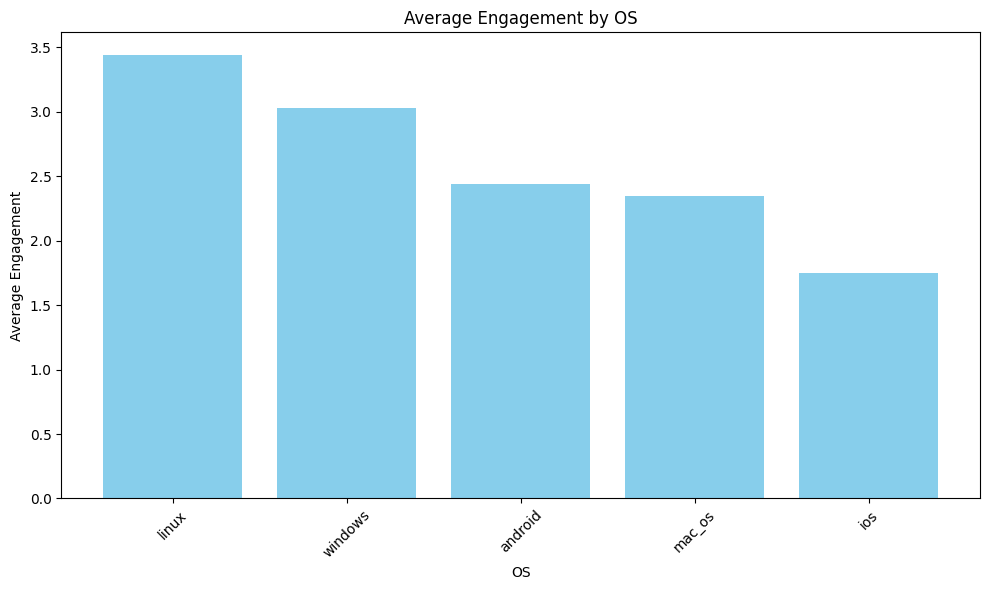

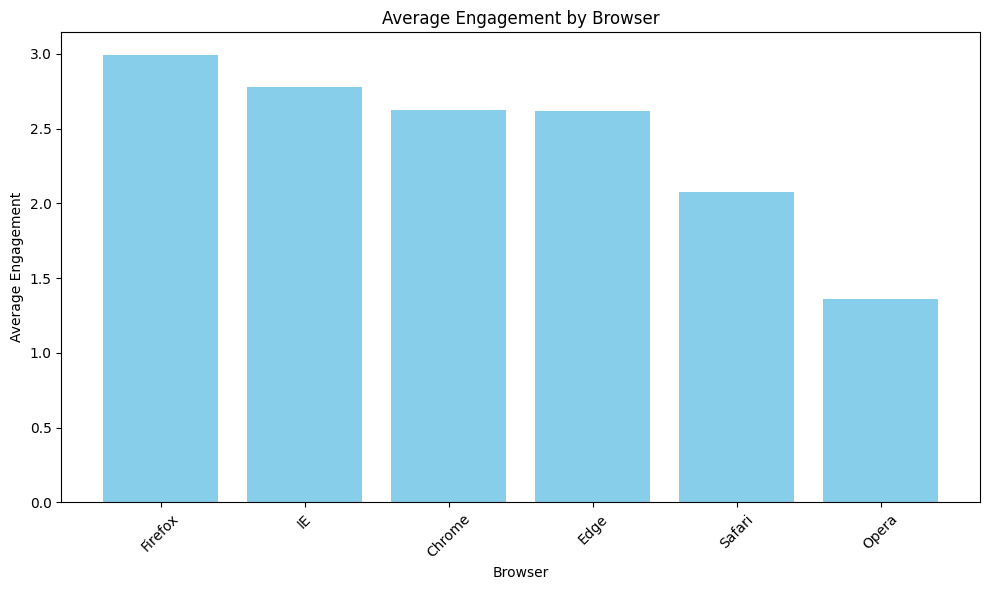

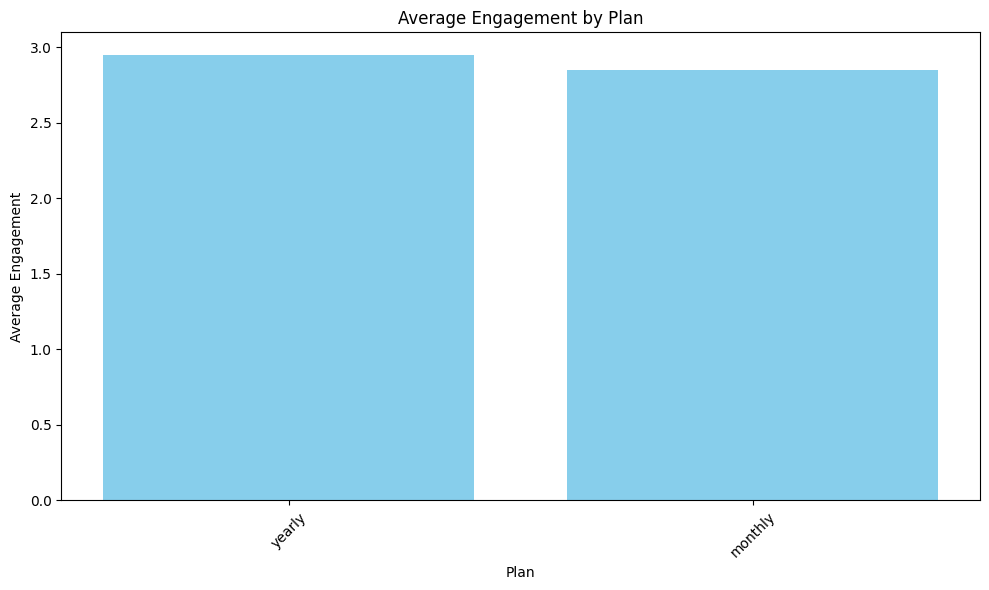

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month from the timestamp
df['month'] = df['ts'].dt.to_period('M')

# Calculate engagement (number of unique actions) for each user per month
engagement = df.groupby(['user_id', 'month'])['page'].nunique().reset_index(name='engagement')

# Merge engagement data back to the main DataFrame
df = df.merge(engagement, on=['user_id', 'month'], how='left')

# Calculate average engagement by OS
avg_engagement_os = df.groupby('os')['engagement'].mean().reset_index().sort_values(by='engagement', ascending=False)

# Calculate average engagement by Browser
avg_engagement_browser = df.groupby('browser')['engagement'].mean().reset_index().sort_values(by='engagement', ascending=False)

# Calculate average engagement by Plan
avg_engagement_plan = df.groupby('plan')['engagement'].mean().reset_index().sort_values(by='engagement', ascending=False)

# Display the results
print("Average Engagement by OS:")
print(avg_engagement_os)

print("\nAverage Engagement by Browser:")
print(avg_engagement_browser)

print("\nAverage Engagement by Plan:")
print(avg_engagement_plan)

# Plot average engagement by OS
plt.figure(figsize=(10, 6))
plt.bar(avg_engagement_os['os'], avg_engagement_os['engagement'], color='skyblue')
plt.xlabel('OS')
plt.ylabel('Average Engagement')
plt.title('Average Engagement by OS')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot average engagement by Browser
plt.figure(figsize=(10, 6))
plt.bar(avg_engagement_browser['browser'], avg_engagement_browser['engagement'], color='skyblue')
plt.xlabel('Browser')
plt.ylabel('Average Engagement')
plt.title('Average Engagement by Browser')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot average engagement by Plan
plt.figure(figsize=(10, 6))
plt.bar(avg_engagement_plan['plan'], avg_engagement_plan['engagement'], color='skyblue')
plt.xlabel('Plan')
plt.ylabel('Average Engagement')
plt.title('Average Engagement by Plan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
4           4 2020-01-19 02:23:02  212955203693754102065312977639302287127   

        os  browser     plan      page    month  
0   mac_os  Firefox  monthly     merge  2020-01  
1   mac_os  Firefox  monthly    delete  2020-01  
2  windows  Firefox  monthly    export  2020-01  
3  windows  Firefox  monthly    rotate  2020-01  
4  windows  Firefox  monthly  compress  2020-01  
      month  new_users
0   2018-05          1
1   2018-08          1
2   2018-11          1
3   2019-09         17
4   2019-10         16
5   2019-11         18
6   2019-12         18
7   2020-01        408
8   2020-02        500
9

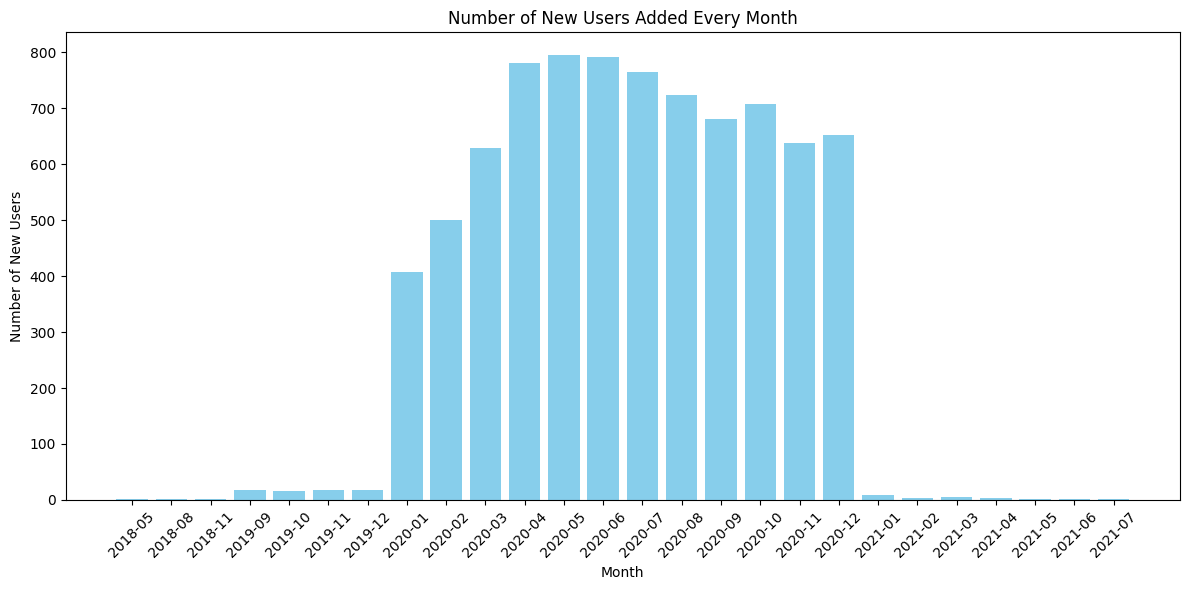

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month from the timestamp
df['month'] = df['ts'].dt.to_period('M')

# Display the first few rows of the DataFrame
print(df.head())

# Sort the dataframe by user_id and timestamp
df = df.sort_values(by=['user_id', 'ts'])

# Identify the first month each user appeared
df['first_month'] = df.groupby('user_id')['month'].transform('min')

# Filter the dataframe to only include the first appearance of each user
new_users_per_month = df[df['month'] == df['first_month']]

# Count the number of new users per month
new_users_count = new_users_per_month.groupby('month')['user_id'].nunique().reset_index(name='new_users')

# Display the count of new users per month
print(new_users_count)

# Plot the number of new users added every month
plt.figure(figsize=(12, 6))
plt.bar(new_users_count['month'].astype(str), new_users_count['new_users'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of New Users')
plt.title('Number of New Users Added Every Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
4           4 2020-01-19 02:23:02  212955203693754102065312977639302287127   

        os  browser     plan      page    month  
0   mac_os  Firefox  monthly     merge  2020-01  
1   mac_os  Firefox  monthly    delete  2020-01  
2  windows  Firefox  monthly    export  2020-01  
3  windows  Firefox  monthly    rotate  2020-01  
4  windows  Firefox  monthly  compress  2020-01  
      month  dropoff_users
0   2019-11              1
1   2019-12              2
2   2020-01            322
3   2020-02            423
4   2020-03            525
5   2020-04            663
6   2020-05            682
7   2020-06    

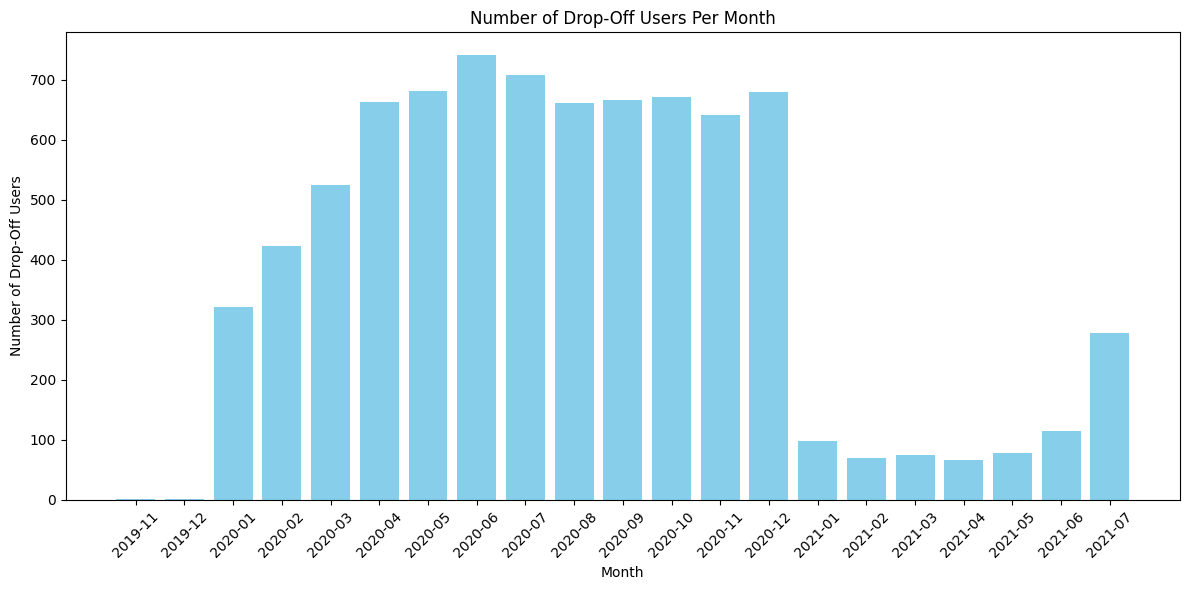

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)
# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month from the timestamp
df['month'] = df['ts'].dt.to_period('M')

# Display the first few rows of the DataFrame
print(df.head())

# Sort the dataframe by user_id and timestamp
df = df.sort_values(by=['user_id', 'ts'])

# Identify the last month each user appeared
df['last_month'] = df.groupby('user_id')['month'].transform('max')

# Filter the dataframe to only include the last appearance of each user
dropoff_users_per_month = df[df['month'] == df['last_month']]

# Count the number of drop-off users per month
dropoff_users_count = dropoff_users_per_month.groupby('month')['user_id'].nunique().reset_index(name='dropoff_users')

# Display the count of drop-off users per month
print(dropoff_users_count)

# Plot the number of drop-off users per month
plt.figure(figsize=(12, 6))
plt.bar(dropoff_users_count['month'].astype(str), dropoff_users_count['dropoff_users'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Drop-Off Users')
plt.title('Number of Drop-Off Users Per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
4           4 2020-01-19 02:23:02  212955203693754102065312977639302287127   

        os  browser     plan      page    month  
0   mac_os  Firefox  monthly     merge  2020-01  
1   mac_os  Firefox  monthly    delete  2020-01  
2  windows  Firefox  monthly    export  2020-01  
3  windows  Firefox  monthly    rotate  2020-01  
4  windows  Firefox  monthly  compress  2020-01  
      month  total_users  new_users  churned_users  retained_users
0   2018-05            1        1.0            0.0             0.0
1   2018-06            1        0.0            0.0             1.0
2   2018-08            2      

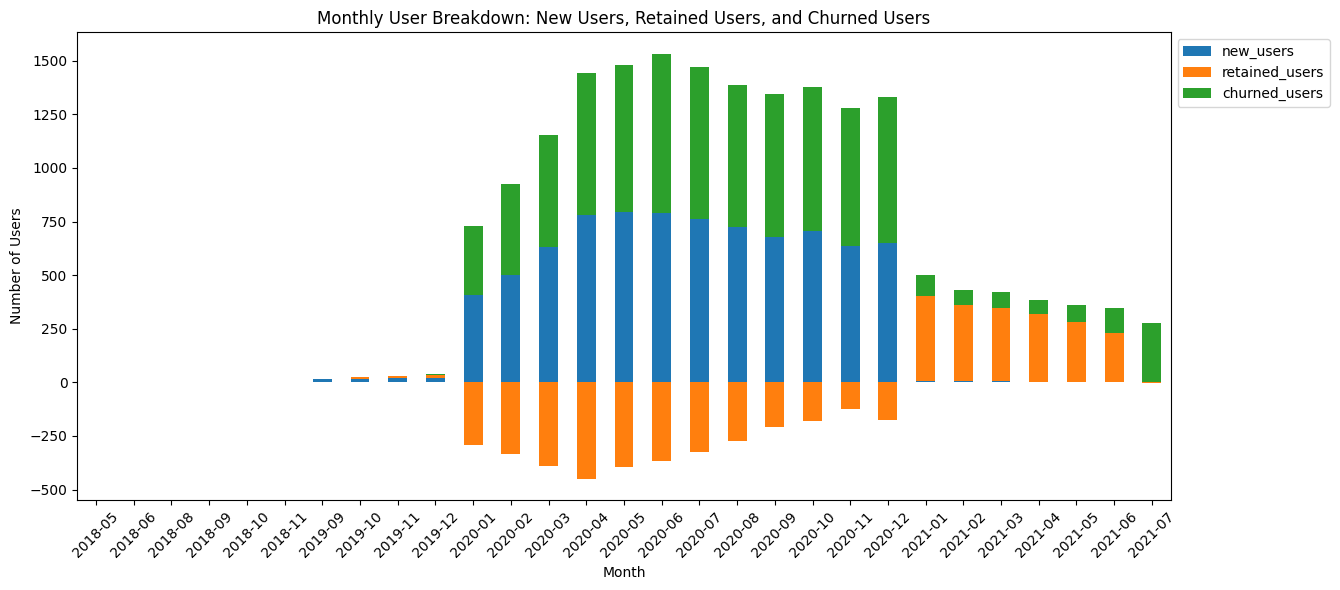

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)
# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month from the timestamp
df['month'] = df['ts'].dt.to_period('M')

# Display the first few rows of the DataFrame
print(df.head())

# Sort the dataframe by user_id and timestamp
df = df.sort_values(by=['user_id', 'ts'])

# Identify the first month each user appeared
df['first_month'] = df.groupby('user_id')['month'].transform('min')

# Identify the last month each user appeared
df['last_month'] = df.groupby('user_id')['month'].transform('max')

# Create a dataframe for the new users
new_users = df[df['month'] == df['first_month']].groupby('month')['user_id'].nunique().reset_index(name='new_users')

# Create a dataframe for the churned users
churned_users = df[df['month'] == df['last_month']].groupby('month')['user_id'].nunique().reset_index(name='churned_users')

# Calculate total users per month
total_users_per_month = df.groupby('month')['user_id'].nunique().reset_index(name='total_users')

# Calculate retained users as total users - new users - churned users
retained_users_per_month = total_users_per_month.merge(new_users, on='month', how='left').merge(churned_users, on='month', how='left')
retained_users_per_month.fillna(0, inplace=True)
retained_users_per_month['retained_users'] = retained_users_per_month['total_users'] - retained_users_per_month['new_users'] - retained_users_per_month['churned_users']

# Display the dataframe with new users, retained users, and churned users
print(retained_users_per_month)

# Set the month as the index for plotting
retained_users_per_month.set_index('month', inplace=True)

# Plot the stacked bar chart
retained_users_per_month[['new_users', 'retained_users', 'churned_users']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.title('Monthly User Breakdown: New Users, Retained Users, and Churned Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
4           4 2020-01-19 02:23:02  212955203693754102065312977639302287127   

        os  browser     plan      page    month  
0   mac_os  Firefox  monthly     merge  2020-01  
1   mac_os  Firefox  monthly    delete  2020-01  
2  windows  Firefox  monthly    export  2020-01  
3  windows  Firefox  monthly    rotate  2020-01  
4  windows  Firefox  monthly  compress  2020-01  
      month  new_users  active_retained_users  retained_users  churned_users  \
23  2018-05        1.0                    1.0             1.0            0.0   
24  2018-06        0.0                    0.0             0.0          

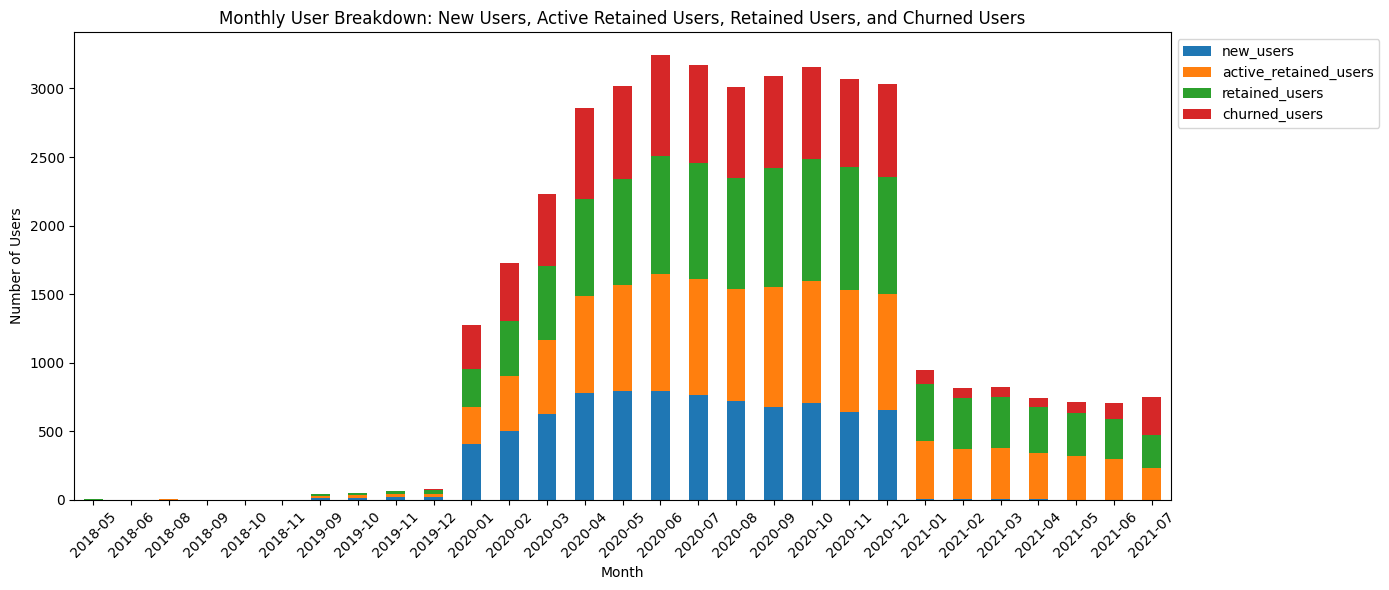

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)
# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month from the timestamp
df['month'] = df['ts'].dt.to_period('M')

# Display the first few rows of the DataFrame
print(df.head())

# Sort the dataframe by user_id and timestamp
df = df.sort_values(by=['user_id', 'ts'])

# Identify the first month each user appeared
df['first_month'] = df.groupby('user_id')['month'].transform('min')

# Identify the last month each user appeared
df['last_month'] = df.groupby('user_id')['month'].transform('max')

# Identify new users (users who have done the task for the first time in the current month)
new_users = df[df['month'] == df['first_month']].groupby('month')['user_id'].nunique().reset_index(name='new_users')

# Identify churned users (users who have done a task sometime in the past or current month and no more tasks in the future)
churned_users = df[df['month'] == df['last_month']].groupby('month')['user_id'].nunique().reset_index(name='churned_users')

# Identify active retained users (users who have done a task sometime in the previous month and also in the current month)
df['previous_month'] = df['month'] - 1
active_retained_users = df[df.duplicated(['user_id', 'month'], keep=False)]
active_retained_users = active_retained_users.groupby('month')['user_id'].nunique().reset_index(name='active_retained_users')

# Identify retained users (users who have done a task sometime in the past month and a task in the future)
df['next_month'] = df['month'] + 1
retained_users = df[df.duplicated(['user_id', 'next_month'], keep=False)]
retained_users = retained_users.groupby('month')['user_id'].nunique().reset_index(name='retained_users')

# Merge the dataframes
user_breakdown = pd.DataFrame(df['month'].unique(), columns=['month'])
user_breakdown = user_breakdown.merge(new_users, on='month', how='left')
user_breakdown = user_breakdown.merge(active_retained_users, on='month', how='left')
user_breakdown = user_breakdown.merge(retained_users, on='month', how='left')
user_breakdown = user_breakdown.merge(churned_users, on='month', how='left')
user_breakdown.fillna(0, inplace=True)

# Calculate total users
user_breakdown['total_users'] = user_breakdown['new_users'] + user_breakdown['active_retained_users'] + user_breakdown['retained_users'] - user_breakdown['churned_users']

# Sort the dataframe by month
user_breakdown = user_breakdown.sort_values(by='month')

# Display the dataframe with new users, active retained users, retained users, churned users, and total users
print(user_breakdown)

# Set the month as the index for plotting
user_breakdown.set_index('month', inplace=True)

# Plot the stacked bar chart
user_breakdown[['new_users', 'active_retained_users', 'retained_users', 'churned_users']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.title('Monthly User Breakdown: New Users, Active Retained Users, Retained Users, and Churned Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
4           4 2020-01-19 02:23:02  212955203693754102065312977639302287127   

        os  browser     plan      page    month  
0   mac_os  Firefox  monthly     merge  2020-01  
1   mac_os  Firefox  monthly    delete  2020-01  
2  windows  Firefox  monthly    export  2020-01  
3  windows  Firefox  monthly    rotate  2020-01  
4  windows  Firefox  monthly  compress  2020-01  
      month  new_users  new_users_churned  existing_users_churned  \
23  2018-05        1.0                0.0                     0.0   
24  2018-06        0.0                0.0                     0.0   
25  2018-08        1.0  

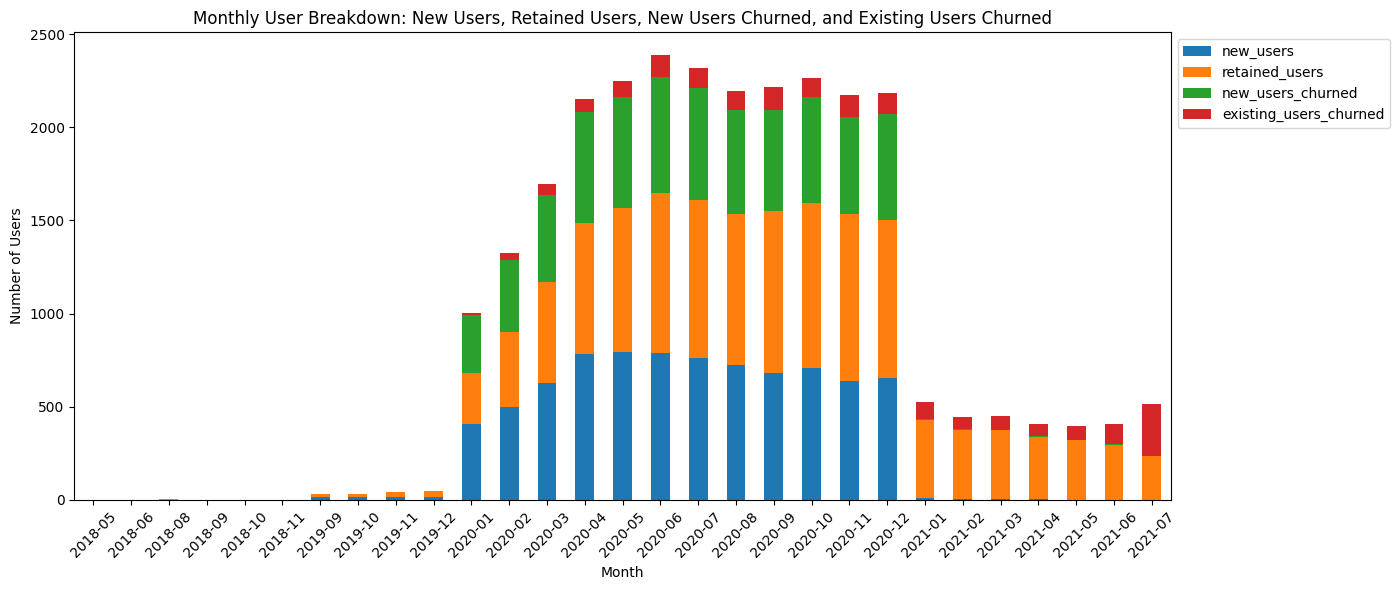

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)
# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month from the timestamp
df['month'] = df['ts'].dt.to_period('M')

# Display the first few rows of the DataFrame
print(df.head())

# Sort the dataframe by user_id and timestamp
df = df.sort_values(by=['user_id', 'ts'])

# Identify the first month each user appeared
df['first_month'] = df.groupby('user_id')['month'].transform('min')

# Identify the last month each user appeared
df['last_month'] = df.groupby('user_id')['month'].transform('max')

# Identify new users (users who have done the task for the first time in the current month)
new_users = df[df['month'] == df['first_month']].groupby('month')['user_id'].nunique().reset_index(name='new_users')

# Identify churned users (users who have done a task sometime in the past or current month and no more tasks in the future)
churned_users = df[df['month'] == df['last_month']]

# Identify new users churned (new users in current month who churned)
new_users_churned = churned_users[churned_users['month'] == churned_users['first_month']].groupby('month')['user_id'].nunique().reset_index(name='new_users_churned')

# Identify existing users churned (users who had tasks in previous months and current month but no tasks in future)
existing_users_churned = churned_users[churned_users['month'] != churned_users['first_month']].groupby('month')['user_id'].nunique().reset_index(name='existing_users_churned')

# Identify retained users (users who have done a task sometime in the past month and a task in the future)
df['next_month'] = df['month'] + 1
retained_users = df[df.duplicated(['user_id', 'next_month'], keep=False)]
retained_users = retained_users.groupby('month')['user_id'].nunique().reset_index(name='retained_users')

# Merge the dataframes
user_breakdown = pd.DataFrame(df['month'].unique(), columns=['month'])
user_breakdown = user_breakdown.merge(new_users, on='month', how='left')
user_breakdown = user_breakdown.merge(new_users_churned, on='month', how='left')
user_breakdown = user_breakdown.merge(existing_users_churned, on='month', how='left')
user_breakdown = user_breakdown.merge(retained_users, on='month', how='left')
user_breakdown.fillna(0, inplace=True)

# Calculate total users
user_breakdown['total_users'] = user_breakdown['new_users'] + user_breakdown['retained_users']

# Sort the dataframe by month
user_breakdown = user_breakdown.sort_values(by='month')

# Display the dataframe with new users, retained users, new users churned, existing users churned, and total users
print(user_breakdown)

# Set the month as the index for plotting
user_breakdown.set_index('month', inplace=True)

# Plot the stacked bar chart
user_breakdown[['new_users', 'retained_users', 'new_users_churned', 'existing_users_churned']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.title('Monthly User Breakdown: New Users, Retained Users, New Users Churned, and Existing Users Churned')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
4           4 2020-01-19 02:23:02  212955203693754102065312977639302287127   

        os  browser     plan      page    month  
0   mac_os  Firefox  monthly     merge  2020-01  
1   mac_os  Firefox  monthly    delete  2020-01  
2  windows  Firefox  monthly    export  2020-01  
3  windows  Firefox  monthly    rotate  2020-01  
4  windows  Firefox  monthly  compress  2020-01  
        Unnamed: 0                  ts  \
61458        61458 2020-10-16 09:28:43   
23262        23262 2020-10-16 09:30:56   
139163      139163 2020-10-16 09:30:56   
31739        31739 2020-10-16 09:32:12   
30085        30085 20

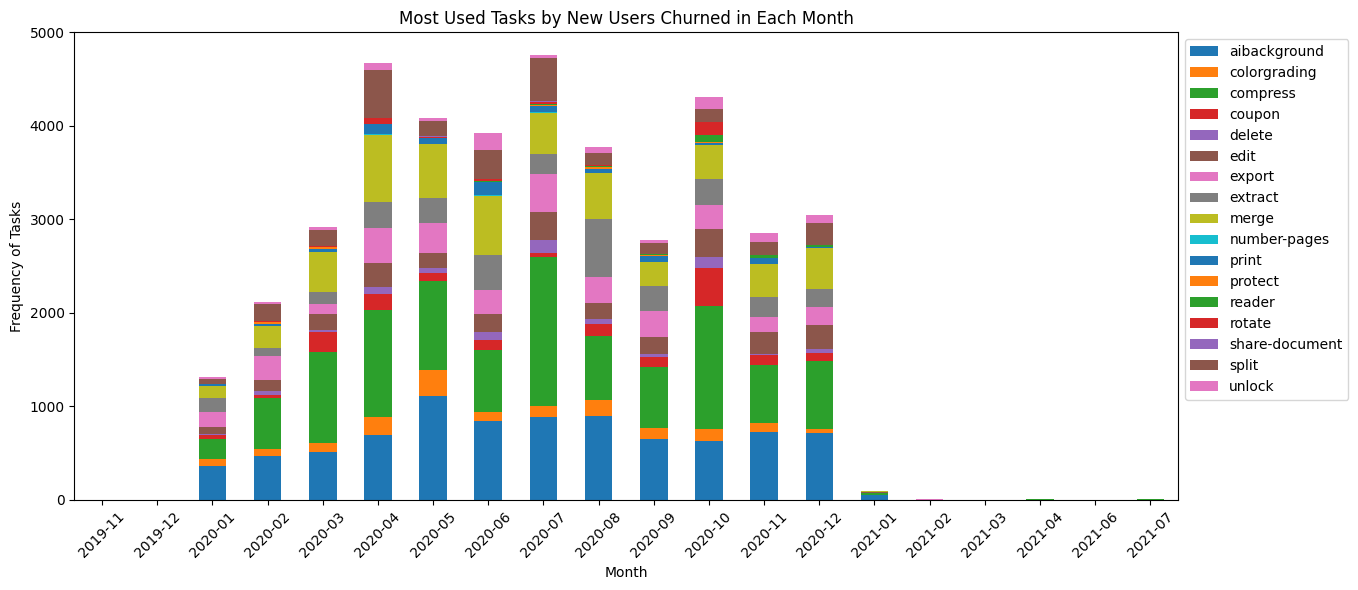

      month  total_tasks
0   2019-11            1
1   2019-12            3
2   2020-01         1309
3   2020-02         2119
4   2020-03         2916
5   2020-04         4676
6   2020-05         4089
7   2020-06         3925
8   2020-07         4762
9   2020-08         3772
10  2020-09         2779
11  2020-10         4304
12  2020-11         2853
13  2020-12         3042
14  2021-01           97
15  2021-02            9
16  2021-03            1
17  2021-04            6
18  2021-06            2
19  2021-07            6


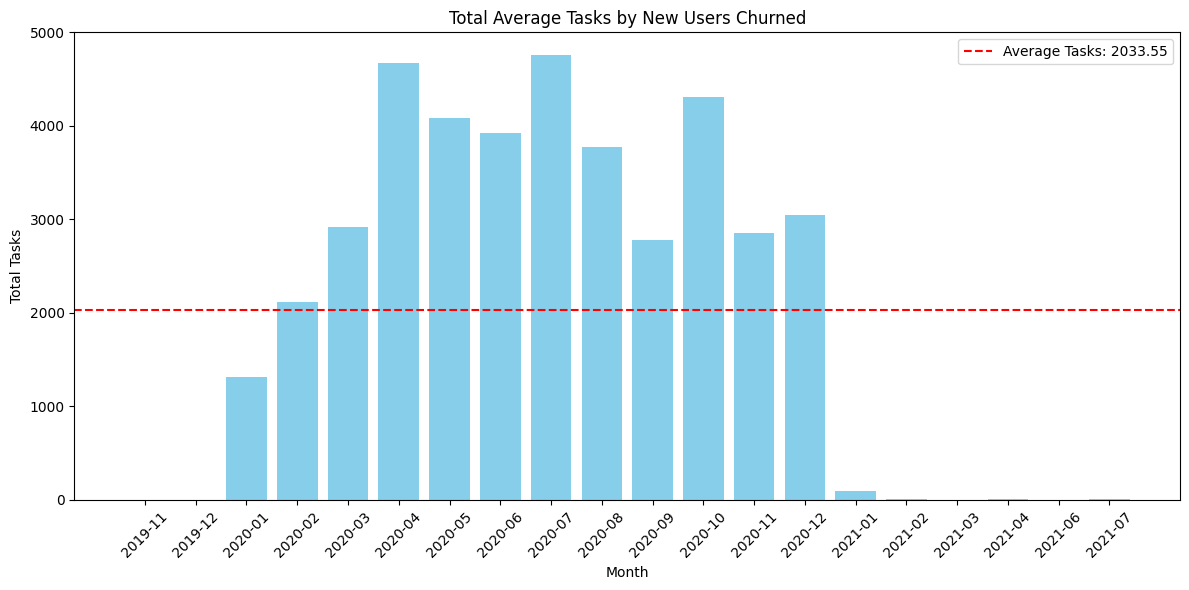

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)
# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month from the timestamp
df['month'] = df['ts'].dt.to_period('M')

# Display the first few rows of the DataFrame
print(df.head())

# Sort the dataframe by user_id and timestamp
df = df.sort_values(by=['user_id', 'ts'])

# Identify the first month each user appeared
df['first_month'] = df.groupby('user_id')['month'].transform('min')

# Identify the last month each user appeared
df['last_month'] = df.groupby('user_id')['month'].transform('max')

# Identify churned users (users who have done a task sometime in the past or current month and no more tasks in the future)
churned_users = df[df['month'] == df['last_month']]

# Identify new users churned (new users in current month who churned)
new_users_churned = churned_users[churned_users['month'] == churned_users['first_month']]

# Display the new users churned dataframe
print(new_users_churned.head())

# Calculate the frequency of tasks for new users churned in each month
tasks_frequency = new_users_churned.groupby(['month', 'page']).size().unstack(fill_value=0)

# Display the tasks frequency
print(tasks_frequency)

# Plot the stacked bar chart
tasks_frequency.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Frequency of Tasks')
plt.title('Most Used Tasks by New Users Churned in Each Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Calculate the total tasks by new users churned in each month
total_tasks_by_new_users_churned = new_users_churned.groupby('month')['user_id'].size().reset_index(name='total_tasks')

# Calculate the average tasks by new users churned
average_tasks_by_new_users_churned = total_tasks_by_new_users_churned['total_tasks'].mean()

# Display the total tasks by new users churned
print(total_tasks_by_new_users_churned)

# Plot the bar graph for total average tasks by new users churned
plt.figure(figsize=(12, 6))
plt.bar(total_tasks_by_new_users_churned['month'].astype(str), total_tasks_by_new_users_churned['total_tasks'], color='skyblue')
plt.axhline(y=average_tasks_by_new_users_churned, color='r', linestyle='--', label=f'Average Tasks: {average_tasks_by_new_users_churned:.2f}')
plt.xlabel('Month')
plt.ylabel('Total Tasks')
plt.title('Total Average Tasks by New Users Churned')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
4           4 2020-01-19 02:23:02  212955203693754102065312977639302287127   

        os  browser     plan      page    month  
0   mac_os  Firefox  monthly     merge  2020-01  
1   mac_os  Firefox  monthly    delete  2020-01  
2  windows  Firefox  monthly    export  2020-01  
3  windows  Firefox  monthly    rotate  2020-01  
4  windows  Firefox  monthly  compress  2020-01  
        Unnamed: 0                  ts  \
61458        61458 2020-10-16 09:28:43   
23262        23262 2020-10-16 09:30:56   
139163      139163 2020-10-16 09:30:56   
31739        31739 2020-10-16 09:32:12   
30085        30085 20

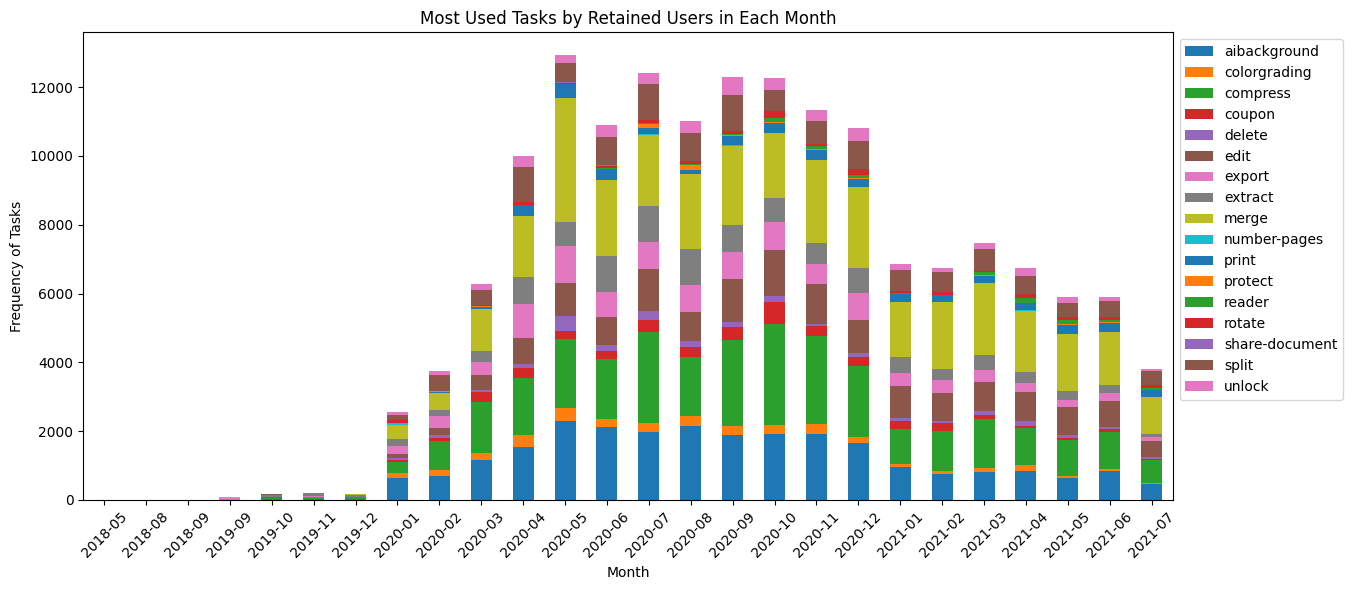

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)
# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month from the timestamp
df['month'] = df['ts'].dt.to_period('M')

# Display the first few rows of the DataFrame
print(df.head())

# Sort the dataframe by user_id and timestamp
df = df.sort_values(by=['user_id', 'ts'])

# Identify the first month each user appeared
df['first_month'] = df.groupby('user_id')['month'].transform('min')

# Identify the last month each user appeared
df['last_month'] = df.groupby('user_id')['month'].transform('max')

# Identify retained users (users who have done a task sometime in the past month and a task in the future)
df['next_month'] = df['month'] + 1
retained_users = df[df.duplicated(['user_id', 'next_month'], keep=False)]

# Display the retained users dataframe
print(retained_users.head())

# Calculate the frequency of tasks for retained users in each month
tasks_frequency_retained = retained_users.groupby(['month', 'page']).size().unstack(fill_value=0)

# Display the tasks frequency
print(tasks_frequency_retained)

# Plot the stacked bar chart
tasks_frequency_retained.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Frequency of Tasks')
plt.title('Most Used Tasks by Retained Users in Each Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


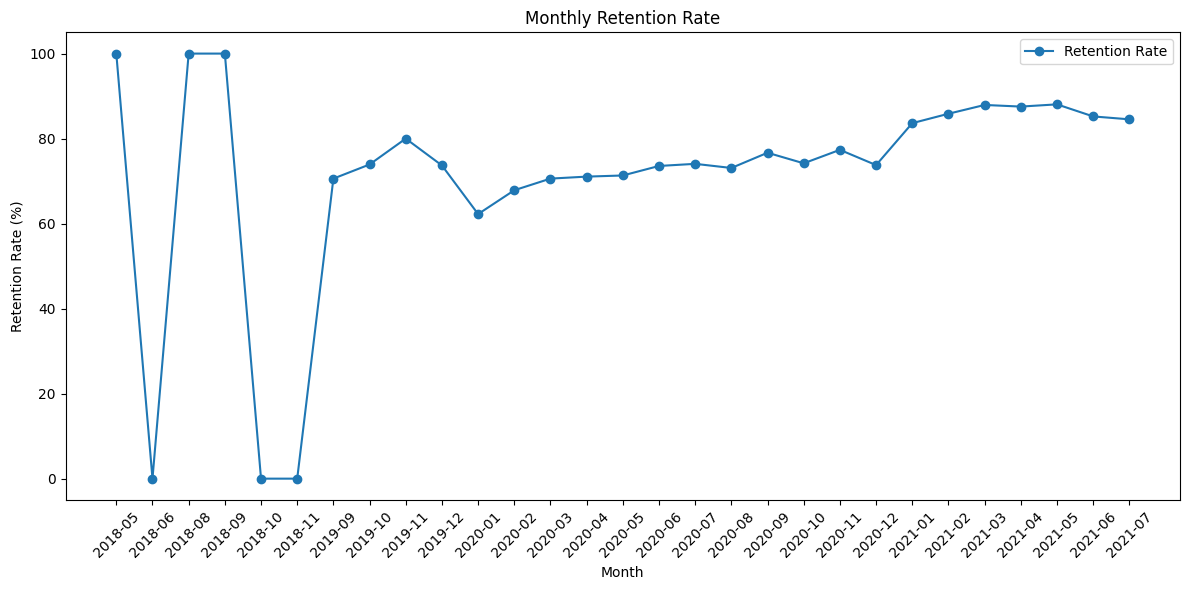

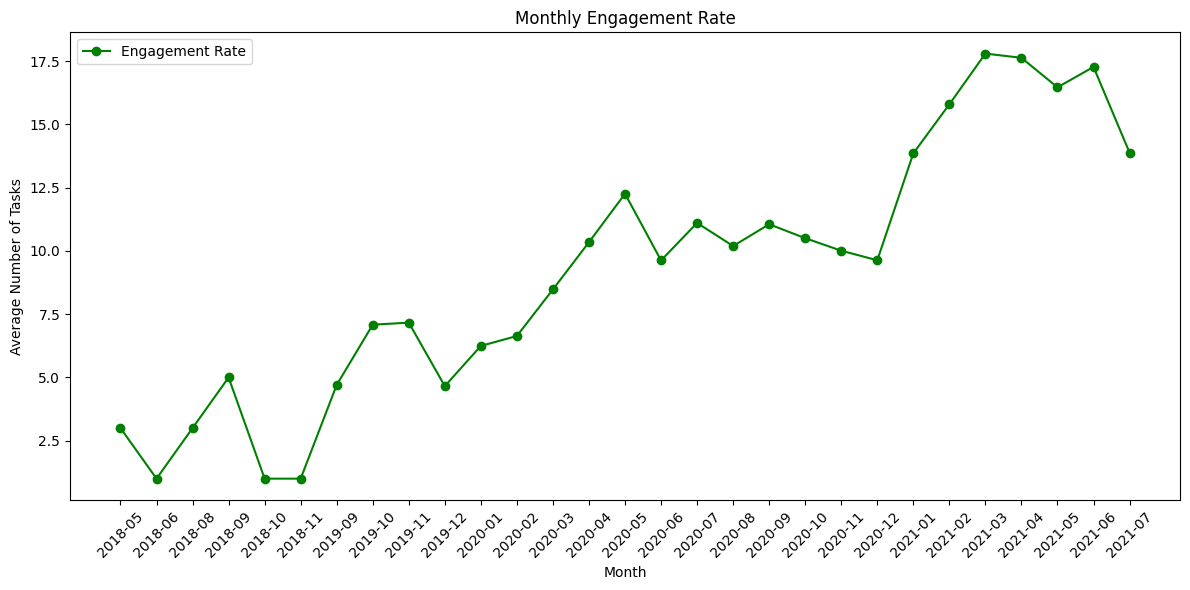

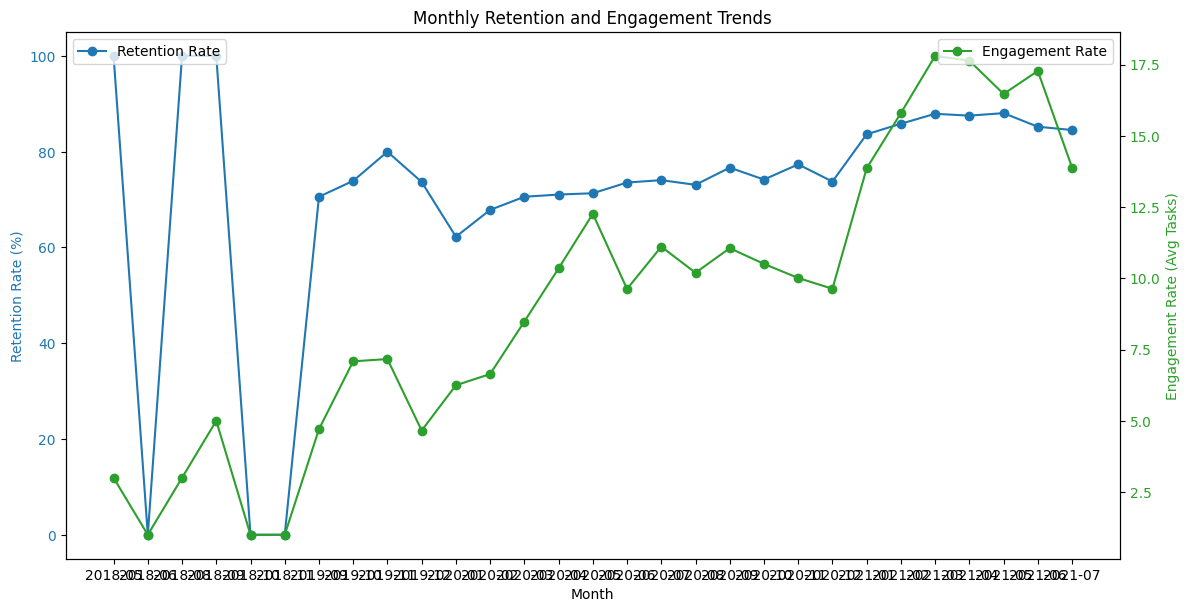

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month from the timestamp
df['month'] = df['ts'].dt.to_period('M')

# Display the first few rows of the DataFrame
#print(df.head())

# Sort the dataframe by user_id and timestamp
df = df.sort_values(by=['user_id', 'ts'])

# Identify the first and last month each user appeared
df['first_month'] = df.groupby('user_id')['month'].transform('min')
df['last_month'] = df.groupby('user_id')['month'].transform('max')

# Identify users retained in the following month
df['next_month'] = df['month'] + 1
retained_users = df[df.duplicated(['user_id', 'next_month'], keep=False)]

# Calculate total users and retained users per month
total_users_per_month = df.groupby('month')['user_id'].nunique().reset_index(name='total_users')
retained_users_per_month = retained_users.groupby('month')['user_id'].nunique().reset_index(name='retained_users')

# Merge the dataframes and calculate the retention rate
retention_data = total_users_per_month.merge(retained_users_per_month, on='month', how='left').fillna(0)
retention_data['retention_rate'] = (retention_data['retained_users'] / retention_data['total_users']) * 100

# Display the retention data
#print(retention_data)

# Calculate the number of tasks completed by each user in each month
engagement = df.groupby(['month', 'user_id'])['page'].count().reset_index()

# Calculate the average number of tasks per user for each month
engagement_rate = engagement.groupby('month')['page'].mean().reset_index(name='engagement_rate')

# Display the engagement rate data
#print(engagement_rate)

# Merge retention data and engagement rate data
trend_data = retention_data.merge(engagement_rate, on='month')

# Plot retention rate
plt.figure(figsize=(12, 6))
plt.plot(trend_data['month'].astype(str), trend_data['retention_rate'], marker='o', label='Retention Rate')
plt.xlabel('Month')
plt.ylabel('Retention Rate (%)')
plt.title('Monthly Retention Rate')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot engagement rate
plt.figure(figsize=(12, 6))
plt.plot(trend_data['month'].astype(str), trend_data['engagement_rate'], marker='o', label='Engagement Rate', color='green')
plt.xlabel('Month')
plt.ylabel('Average Number of Tasks')
plt.title('Monthly Engagement Rate')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot both trends on the same graph for comparison
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Retention Rate (%)', color=color)
ax1.plot(trend_data['month'].astype(str), trend_data['retention_rate'], marker='o', color=color, label='Retention Rate')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Engagement Rate (Avg Tasks)', color=color)
ax2.plot(trend_data['month'].astype(str), trend_data['engagement_rate'], marker='o', color=color, label='Engagement Rate')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Monthly Retention and Engagement Trends')
plt.xticks(rotation=45)
plt.show()


   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
4           4 2020-01-19 02:23:02  212955203693754102065312977639302287127   

        os  browser     plan      page    month  
0   mac_os  Firefox  monthly     merge  2020-01  
1   mac_os  Firefox  monthly    delete  2020-01  
2  windows  Firefox  monthly    export  2020-01  
3  windows  Firefox  monthly    rotate  2020-01  
4  windows  Firefox  monthly  compress  2020-01  
      month  total_users  retained_users  churned_users  retention_rate  \
0   2018-05            1             1.0              1      100.000000   
1   2018-06            1             0.0              1        0.000000   
2   20

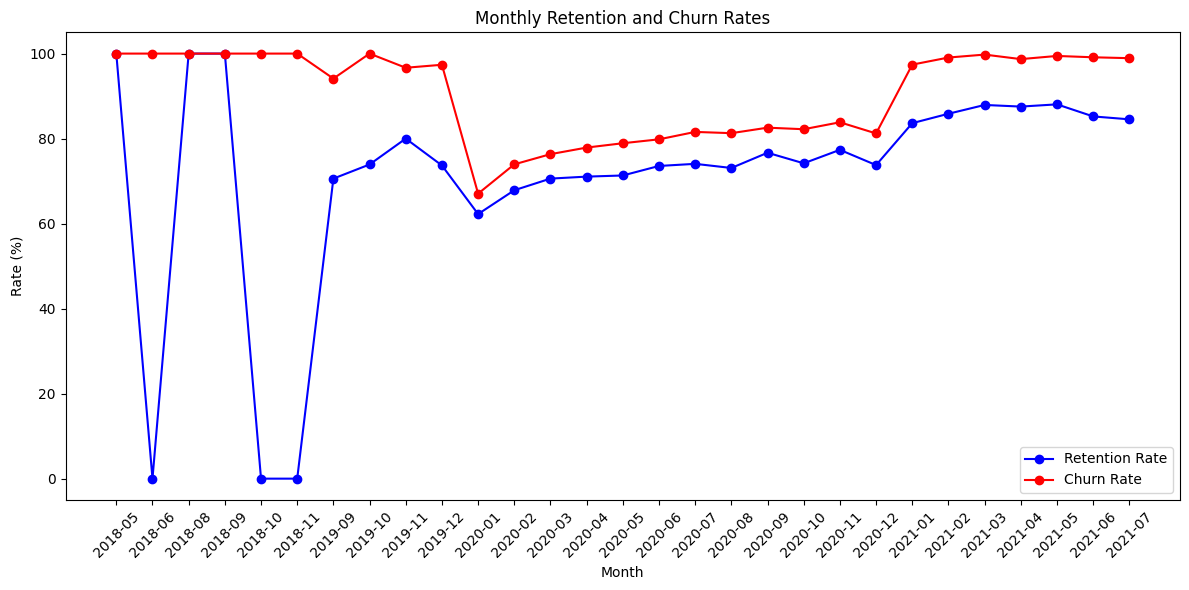

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)
# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month from the timestamp
df['month'] = df['ts'].dt.to_period('M')

# Display the first few rows of the DataFrame
print(df.head())

# Sort the dataframe by user_id and timestamp
df = df.sort_values(by=['user_id', 'ts'])

# Identify the first and last month each user appeared
df['first_month'] = df.groupby('user_id')['month'].transform('min')
df['last_month'] = df.groupby('user_id')['month'].transform('max')

# Identify retained users (users who have at least one task in previous months and at least one task in upcoming months)
df['next_month'] = df['month'] + 1
df['prev_month'] = df['month'] - 1

# Identify users with tasks in the next month
users_with_next_month_tasks = df[df.duplicated(['user_id', 'next_month'], keep=False)]

# Identify users with tasks in the previous month
users_with_prev_month_tasks = df[df.duplicated(['user_id', 'prev_month'], keep=False)]

# Retained users: users with tasks in both previous and next months
retained_users = users_with_next_month_tasks[users_with_next_month_tasks['user_id'].isin(users_with_prev_month_tasks['user_id'])]

# Churned users: users with tasks in the previous month but not in the current or any upcoming month
df['next_month'] = df['month'] + 1
churned_users = df[~df['user_id'].isin(df[df['month'] >= df['next_month']]['user_id']) & df['user_id'].isin(users_with_prev_month_tasks['user_id'])]

# Count total users per month
total_users_per_month = df.groupby('month')['user_id'].nunique().reset_index(name='total_users')

# Count retained users per month
retained_users_per_month = retained_users.groupby('month')['user_id'].nunique().reset_index(name='retained_users')

# Count churned users per month
churned_users_per_month = churned_users.groupby('month')['user_id'].nunique().reset_index(name='churned_users')

# Merge dataframes to get total users, retained users, and churned users per month
user_metrics = total_users_per_month.merge(retained_users_per_month, on='month', how='left').merge(churned_users_per_month, on='month', how='left').fillna(0)

# Calculate retention and churn rates
user_metrics['retention_rate'] = (user_metrics['retained_users'] / user_metrics['total_users']) * 100
user_metrics['churn_rate'] = (user_metrics['churned_users'] / user_metrics['total_users']) * 100

# Display the user metrics data
print(user_metrics)

# Plot the retention and churn rates
plt.figure(figsize=(12, 6))
plt.plot(user_metrics['month'].astype(str), user_metrics['retention_rate'], marker='o', label='Retention Rate', color='blue')
plt.plot(user_metrics['month'].astype(str), user_metrics['churn_rate'], marker='o', label='Churn Rate', color='red')
plt.xlabel('Month')
plt.ylabel('Rate (%)')
plt.title('Monthly Retention and Churn Rates')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
4           4 2020-01-19 02:23:02  212955203693754102065312977639302287127   

        os  browser     plan      page    month  
0   mac_os  Firefox  monthly     merge  2020-01  
1   mac_os  Firefox  monthly    delete  2020-01  
2  windows  Firefox  monthly    export  2020-01  
3  windows  Firefox  monthly    rotate  2020-01  
4  windows  Firefox  monthly  compress  2020-01  
        Unnamed: 0                  ts  \
61458        61458 2020-10-16 09:28:43   
23262        23262 2020-10-16 09:30:56   
139163      139163 2020-10-16 09:30:56   
31739        31739 2020-10-16 09:32:12   
30085        30085 20

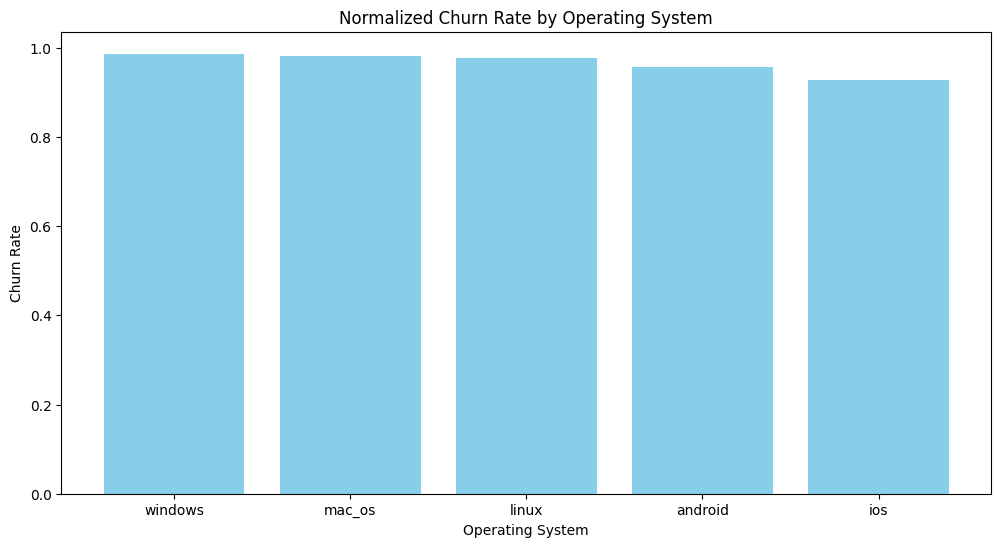

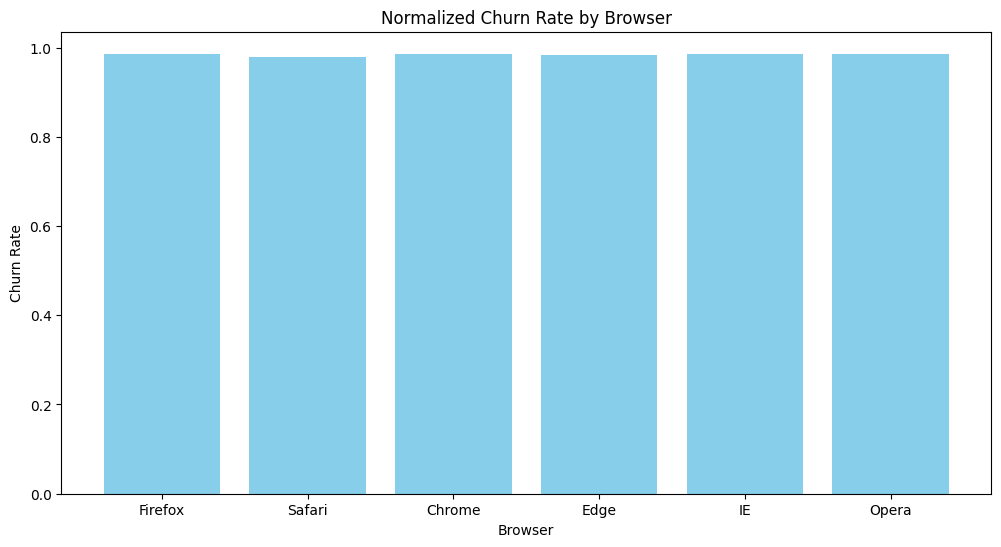

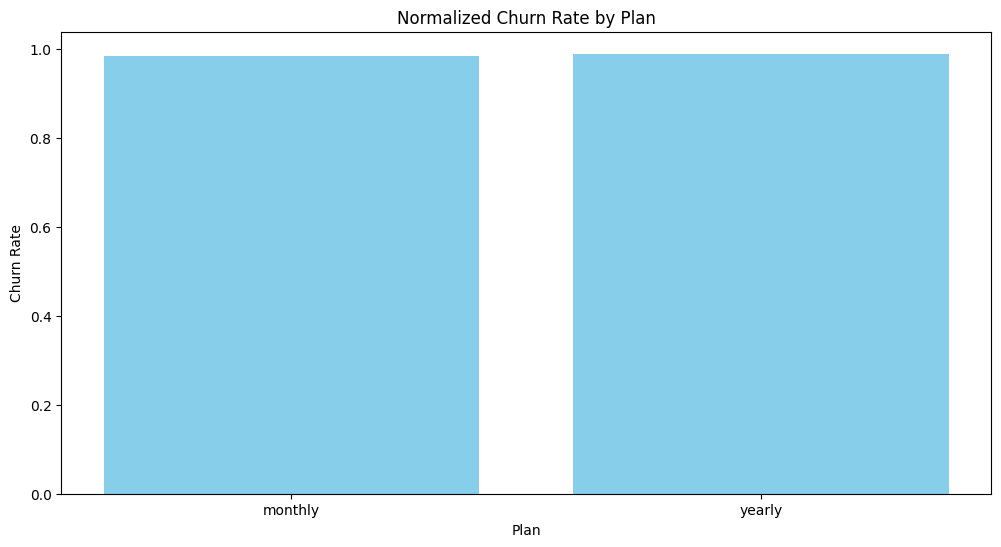

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)
# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month from the timestamp
df['month'] = df['ts'].dt.to_period('M')

# Display the first few rows of the DataFrame
print(df.head())

# Sort the dataframe by user_id and timestamp
df = df.sort_values(by=['user_id', 'ts'])

# Identify the first and last month each user appeared
df['first_month'] = df.groupby('user_id')['month'].transform('min')
df['last_month'] = df.groupby('user_id')['month'].transform('max')

# Identify users with tasks in the previous month
df['prev_month'] = df['month'] - 1
users_with_prev_month_tasks = df[df.duplicated(['user_id', 'prev_month'], keep=False)]

# Churned users: users with tasks in the previous month but not in the current or any upcoming month
df['next_month'] = df['month'] + 1
churned_users = df[~df['user_id'].isin(df[df['month'] >= df['next_month']]['user_id']) & df['user_id'].isin(users_with_prev_month_tasks['user_id'])]

# Display the churned users dataframe
print(churned_users.head())

# Calculate the number of tasks completed by churned users before they churned
tasks_before_churn = churned_users.groupby(['user_id', 'page']).size().unstack(fill_value=0)

# Calculate the total tasks before churn
tasks_before_churn['total_tasks'] = tasks_before_churn.sum(axis=1)

# Display the task completion patterns
print(tasks_before_churn)

# Calculate the number of months each churned user was active
months_active_before_churn = churned_users.groupby('user_id')['month'].nunique().reset_index(name='months_active')

# Display the frequency of task completions before churn
print(months_active_before_churn)

# Analyze churned users by OS
os_churn_analysis = churned_users['os'].value_counts().reset_index(name='count')
os_churn_analysis.columns = ['os', 'count']

# Analyze churned users by Browser
browser_churn_analysis = churned_users['browser'].value_counts().reset_index(name='count')
browser_churn_analysis.columns = ['browser', 'count']

# Analyze churned users by Plan
plan_churn_analysis = churned_users['plan'].value_counts().reset_index(name='count')
plan_churn_analysis.columns = ['plan', 'count']



# Calculate the total number of users for each OS, plan, and browser
total_users_os = df['os'].value_counts().reset_index(name='total_count')
total_users_os.columns = ['os', 'total_count']

total_users_browser = df['browser'].value_counts().reset_index(name='total_count')
total_users_browser.columns = ['browser', 'total_count']

total_users_plan = df['plan'].value_counts().reset_index(name='total_count')
total_users_plan.columns = ['plan', 'total_count']

# Merge the churned user counts with the total user counts
normalized_os_churn = os_churn_analysis.merge(total_users_os, on='os')
normalized_browser_churn = browser_churn_analysis.merge(total_users_browser, on='browser')
normalized_plan_churn = plan_churn_analysis.merge(total_users_plan, on='plan')

# Calculate the normalized churn rate
normalized_os_churn['churn_rate'] = normalized_os_churn['count'] / normalized_os_churn['total_count']
normalized_browser_churn['churn_rate'] = normalized_browser_churn['count'] / normalized_browser_churn['total_count']
normalized_plan_churn['churn_rate'] = normalized_plan_churn['count'] / normalized_plan_churn['total_count']

# Display the normalized churn analysis
print("Normalized OS Churn Analysis")
print(normalized_os_churn)

print("Normalized Browser Churn Analysis")
print(normalized_browser_churn)

print("Normalized Plan Churn Analysis")
print(normalized_plan_churn)

# Plot normalized OS Churn Analysis
plt.figure(figsize=(12, 6))
plt.bar(normalized_os_churn['os'], normalized_os_churn['churn_rate'], color='skyblue')
plt.xlabel('Operating System')
plt.ylabel('Churn Rate')
plt.title('Normalized Churn Rate by Operating System')
plt.show()

# Plot normalized Browser Churn Analysis
plt.figure(figsize=(12, 6))
plt.bar(normalized_browser_churn['browser'], normalized_browser_churn['churn_rate'], color='skyblue')
plt.xlabel('Browser')
plt.ylabel('Churn Rate')
plt.title('Normalized Churn Rate by Browser')
plt.show()

# Plot normalized Plan Churn Analysis
plt.figure(figsize=(12, 6))
plt.bar(normalized_plan_churn['plan'], normalized_plan_churn['churn_rate'], color='skyblue')
plt.xlabel('Plan')
plt.ylabel('Churn Rate')
plt.title('Normalized Churn Rate by Plan')
plt.show()




   Unnamed: 0                  ts                                  user_id  \
0           0 2020-01-02 20:17:21  196669322373702694527343919754227674361   
1           1 2020-01-03 10:22:32  196669322373702694527343919754227674361   
2           2 2020-01-05 02:21:25  212955203693754102065312977639302287127   
3           3 2020-01-05 02:21:44  212955203693754102065312977639302287127   
4           4 2020-01-19 02:23:02  212955203693754102065312977639302287127   

        os  browser     plan      page    month         day  
0   mac_os  Firefox  monthly     merge  2020-01  2020-01-02  
1   mac_os  Firefox  monthly    delete  2020-01  2020-01-03  
2  windows  Firefox  monthly    export  2020-01  2020-01-05  
3  windows  Firefox  monthly    rotate  2020-01  2020-01-05  
4  windows  Firefox  monthly  compress  2020-01  2020-01-19  
       total_tasks
count  8166.000000
mean     20.114989
std      99.680034
min       1.000000
25%       1.000000
50%       3.000000
75%      10.000000
max    

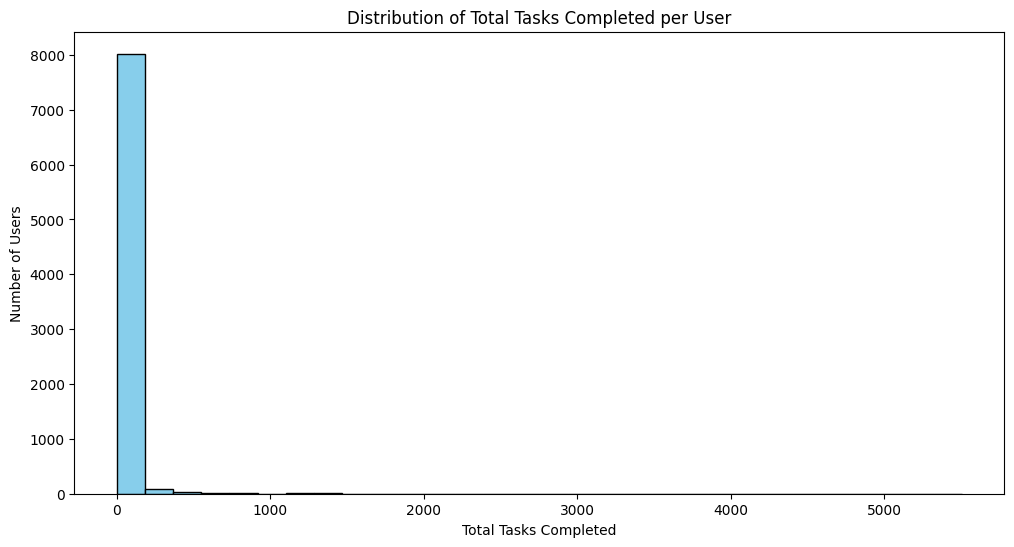

       active_days
count  8166.000000
mean      4.683199
std      15.126798
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max     347.000000


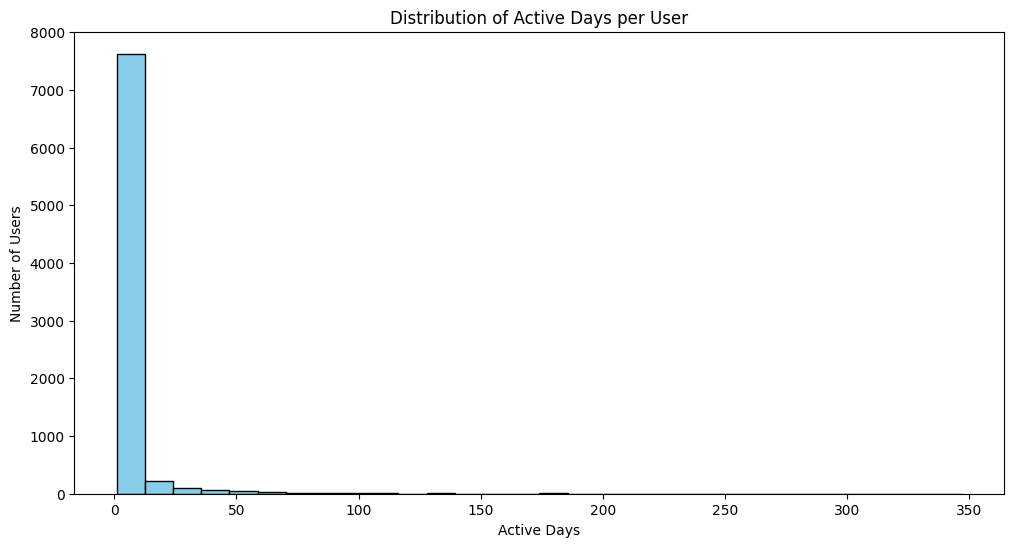

              page  count
0            merge  34838
1         compress  30866
2     aibackground  26739
3             edit  15707
4            split  12174
5          extract  10594
6           export  10446
7           unlock   4689
8           coupon   4300
9            print   4214
10    colorgrading   3908
11          delete   2535
12          rotate   1607
13          reader    936
14         protect    466
15    number-pages    209
16  share-document     31


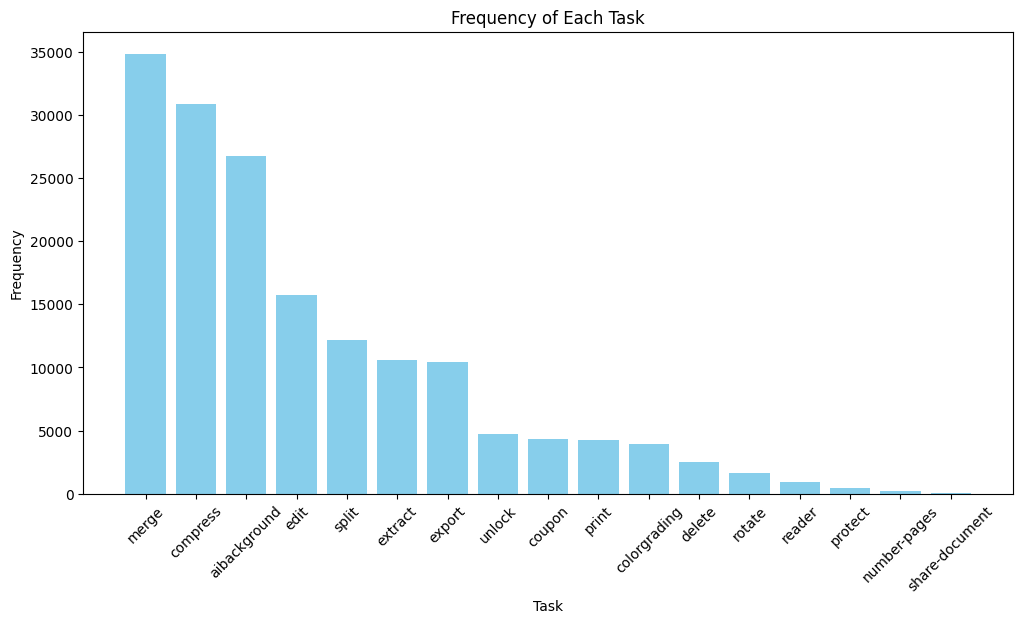

        os  total_tasks
0  android         1212
1      ios         1213
2    linux         1403
3   mac_os        32565
4  windows       127866


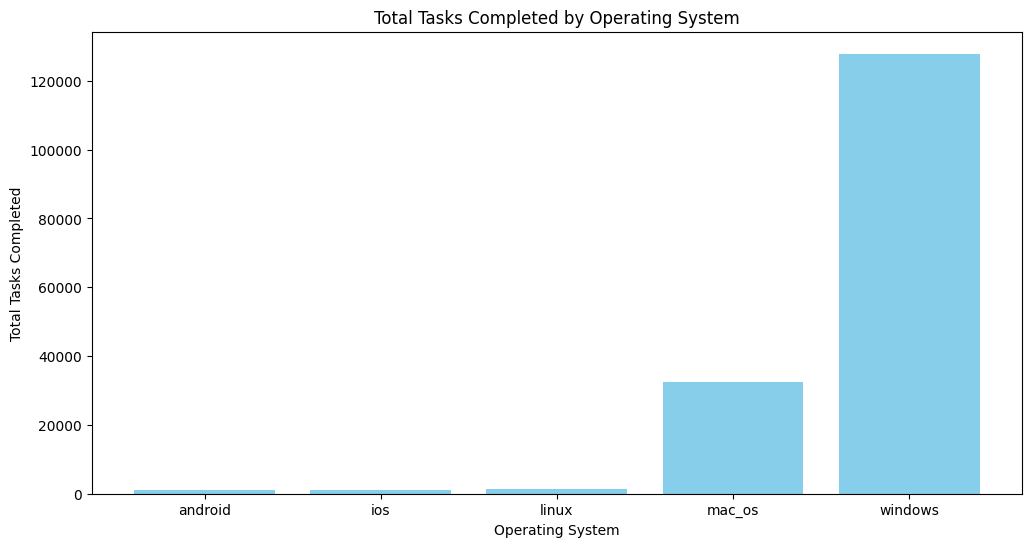

   browser  total_tasks
0   Chrome         8318
1     Edge         3797
2  Firefox       134719
3       IE         3065
4    Opera          351
5   Safari        14009


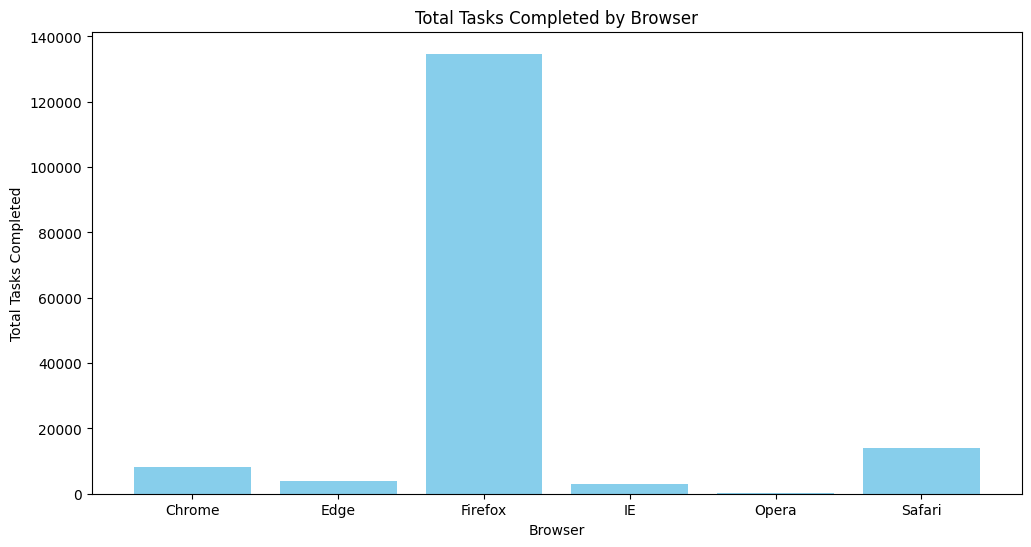

      plan  total_tasks
0  monthly       110534
1   yearly        53725


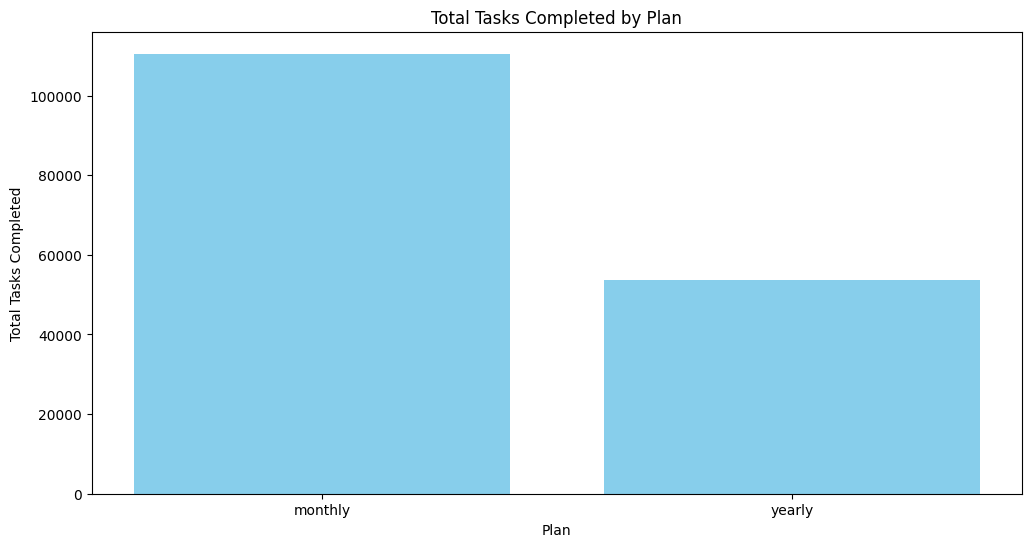

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')
df.dropna(inplace=True)
# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the month and day from the timestamp
df['month'] = df['ts'].dt.to_period('M')
df['day'] = df['ts'].dt.date

# Display the first few rows of the DataFrame
print(df.head())

# Calculate the number of tasks completed by each user
tasks_per_user = df.groupby('user_id')['page'].count().reset_index(name='total_tasks')

# Display the number of tasks completed by each user
print(tasks_per_user.describe())

# Plot the distribution of total tasks per user
plt.figure(figsize=(12, 6))
plt.hist(tasks_per_user['total_tasks'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Total Tasks Completed')
plt.ylabel('Number of Users')
plt.title('Distribution of Total Tasks Completed per User')
plt.show()

# Calculate the number of days each user was active
active_days_per_user = df.groupby('user_id')['day'].nunique().reset_index(name='active_days')

# Display the number of active days per user
print(active_days_per_user.describe())

# Plot the distribution of active days per user
plt.figure(figsize=(12, 6))
plt.hist(active_days_per_user['active_days'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Active Days')
plt.ylabel('Number of Users')
plt.title('Distribution of Active Days per User')
plt.show()

# Calculate the frequency of each task (page)
task_frequency = df['page'].value_counts().reset_index(name='count')
task_frequency.columns = ['page', 'count']

# Display the frequency of each task
print(task_frequency)

# Plot the frequency of each task
plt.figure(figsize=(12, 6))
plt.bar(task_frequency['page'], task_frequency['count'], color='skyblue')
plt.xlabel('Task')
plt.ylabel('Frequency')
plt.title('Frequency of Each Task')
plt.xticks(rotation=45)
plt.show()

# Calculate the number of tasks completed by each OS
tasks_by_os = df.groupby('os')['page'].count().reset_index(name='total_tasks')

# Display the number of tasks completed by each OS
print(tasks_by_os)

# Plot the total tasks by OS
plt.figure(figsize=(12, 6))
plt.bar(tasks_by_os['os'], tasks_by_os['total_tasks'], color='skyblue')
plt.xlabel('Operating System')
plt.ylabel('Total Tasks Completed')
plt.title('Total Tasks Completed by Operating System')
plt.show()

# Calculate the number of tasks completed by each browser
tasks_by_browser = df.groupby('browser')['page'].count().reset_index(name='total_tasks')

# Display the number of tasks completed by each browser
print(tasks_by_browser)

# Plot the total tasks by browser
plt.figure(figsize=(12, 6))
plt.bar(tasks_by_browser['browser'], tasks_by_browser['total_tasks'], color='skyblue')
plt.xlabel('Browser')
plt.ylabel('Total Tasks Completed')
plt.title('Total Tasks Completed by Browser')
plt.show()

# Calculate the number of tasks completed by each plan
tasks_by_plan = df.groupby('plan')['page'].count().reset_index(name='total_tasks')

# Display the number of tasks completed by each plan
print(tasks_by_plan)

# Plot the total tasks by plan
plt.figure(figsize=(12, 6))
plt.bar(tasks_by_plan['plan'], tasks_by_plan['total_tasks'], color='skyblue')
plt.xlabel('Plan')
plt.ylabel('Total Tasks Completed')
plt.title('Total Tasks Completed by Plan')
plt.show()


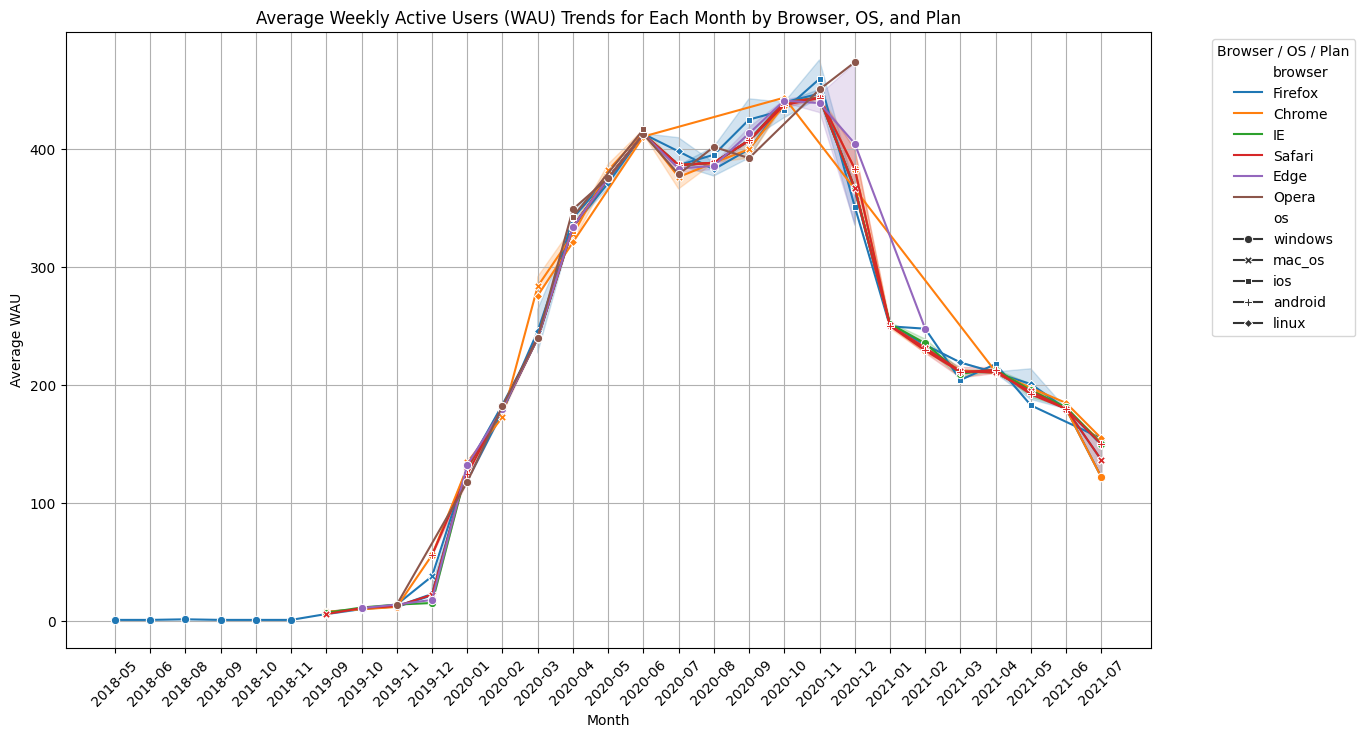

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/Users/kamesh/Downloads/ds-dataset.csv')

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract the week and month from the timestamp
df['week'] = df['ts'].dt.to_period('W')
df['month'] = df['ts'].dt.to_period('M')

# Calculate WAU (Weekly Active Users)
wau = df.groupby('week')['user_id'].nunique().reset_index()
wau.columns = ['week', 'WAU']

# Convert 'week' to the start of the week for consistency
wau['week_start'] = wau['week'].apply(lambda x: x.start_time)

# Extract the month from the week start date
wau['month'] = wau['week_start'].dt.to_period('M')

# Aggregate data by week, browser, os, and plan
agg_data = df.groupby(['week', 'browser', 'os', 'plan']).size().reset_index(name='task_count')

# Merge the aggregated data with WAU
agg_data = agg_data.merge(wau, on='week')

# Extract the month from the week start date in the aggregated data
agg_data['month'] = agg_data['week_start'].dt.to_period('M')

# Aggregate WAU by month for each combination of browser, os, and plan
monthly_combination_wau = agg_data.groupby(['month', 'browser', 'os', 'plan'])['WAU'].mean().reset_index()
monthly_combination_wau.columns = ['month', 'browser', 'os', 'plan', 'average_WAU']

# Ensure 'month' is of type string for plotting purposes
monthly_combination_wau['month'] = monthly_combination_wau['month'].astype(str)

# Plot average WAU trends for each month for each combination of browser, os, and plan
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_combination_wau, x='month', y='average_WAU', hue='browser', style='os', markers=True, dashes=False)
plt.xlabel('Month')
plt.ylabel('Average WAU')
plt.title('Average Weekly Active Users (WAU) Trends for Each Month by Browser, OS, and Plan')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Browser / OS / Plan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
